# Crime Data Analysis

## Objectives

This notebook is made to study the crime data of Chicage which is updated daily although the data for the last seven days is not provided due to ongoing investigations.  We will attempt to observe different patterns in the data and mathe following analytical assessments:

**Single Class**
- Model 1 - Logistic regression with Lasso-based feature selection
- Model 2 - Linear SVM
- Model 3 - Decision Trees
- Model 4 - Naive Bayes Model
- Model 5 - Random Forest
- Model 6 - KNN

**Multi Class Models**
- Model 1 - Decision Trees for Multi Class
- Model 2 - Random Forest for Multi Class
- Model 3 - Logistic for Multi Class with Newton
- Model 4 - Logistic for Multi Class with lbfgs

**Other Models**
- **Principal Component Analysis**
- **Neural Networks**
- **xgBoost**

**Complete Visualization**
- Feature Importance
- Crimes per Location
- Boxplot grouped by Location
- Crimes by Time, Day, Month 
- Comparison of 4 Major Crime Times
- Mapping the location of Crimes

    

## Strategy

The way we will be carrying out various analytical tasks is by performing the following:

- Data Cleaning:  As you will see below the Chicago dataset is huge.  The file we are currently using is 1.6GB and this increases everyday.  However, there are some major issues with the data, some data is missing or incomplete, other data is not complete.  So we will be cleaning up the data.  We will also be using data for crimes from 2017 to 2019 only.  We will ignore previous crime data.

- Modelling the Data:  We will use Single and MUlti Class techniques to see rank crimes based on severity.  We will also compare the results of all these techniques to see how they compare to each other for both test and train.

- Visualizing:  We will visualize the data in different methods.  It will help to understand the reults

## Description of Data

**Chicago Crime Dataset:** This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Data Content is as follows:
- <b>ID</b> - Unique identifier for the record.

- <b>Case Number</b> - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

- <b>Date</b> - Date when the incident occurred. this is sometimes a best estimate.

- <b>Block</b> - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

- <b>IUCR</b> - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

- <b>Primary Type</b> - The primary description of the IUCR code.

- <b>Description</b> - The secondary description of the IUCR code, a subcategory of the primary description.

- <b>Location Description</b> - Description of the location where the incident occurred.

- <b>Arrest</b> - Indicates whether an arrest was made.

- <b>Domestic</b> - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

- <b>Beat</b> - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

- <b>District</b> - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

- <b>Ward</b> - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

- <b>Community Area</b> - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

- <b>FBI Code</b> - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

- <b>X Coordinate</b> - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

- <b>Y Coordinate</b> - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

- <b>Year</b> - Year the incident occurred.

- <b>Updated On</b> - Date and time the record was last updated.

- <b>Latitude</b> - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- <b>Longitude</b> - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- <b>Location</b> - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

### Import Required Libraries

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore')

### Complete PREPROCESSING - Clean, Filter and Prepare Data

#### Some Parameters for a fancy Print function :)

In [2]:
#Print text in various styles :: For the notebook to be more readable
class st:
   cyan = '\033[96m'
   green = '\033[92m'
   red = '\033[91m'
   mag = "\x1b[35m"
   B = '\033[1m'
   U = '\033[4m'
   wb = '\x1b[1;6;30;47m'
   end = '\033[0m'

###### Load the 1.6GB CSV FILE

In [3]:
%%time
#Load the Data approx. 1.6GB
sample=200000
df_unclean = pd.read_csv("crimedata.csv")
df_unclean.dropna(inplace=True)

Wall time: 32 s


###### Start Data Cleaning and Filtering

In [91]:
#Only use data from 2017 to 2019
df_small = df_unclean[(df_unclean['Year'] >= 2017) & (df_unclean['Year'] <= 2019)]

#Take a sample of 200,000 records"
df_small = df_small.sample(n=sample)

In [92]:
#Show the size of the data we are dealing with
print(st.wb + "Total Dataset Size from 2011 till 2019:\t\t" + st.end + st.mag + "", df_unclean.shape)
print(st.wb + "200,000 records filtered '17-'19:\t\t" + st.end + st.mag + "", df_small.shape)

Total Dataset Size from 2011 till 2019:		 (6345047, 22)
200,000 records filtered '17-'19:		 (200000, 22)


#### A quick overview of the data we will be dealing with

In [93]:
df_small.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,200000,NaN,NaN,NaN,1.1331e+07,621325,23059,1.10932e+07,1.13527e+07,1.16208e+07,1.19108e+07
Case Number,200000,199991,JB522024,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,200000,135743,01/01/2017 12:01:00 AM,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,200000,26468,001XX N STATE ST,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUCR,200000,320,0486,18390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,200000,31,THEFT,48074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,200000,300,SIMPLE,22712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,200000,126,STREET,44688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,200000,2,False,159207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic,200000,2,False,166924,NaN,NaN,NaN,NaN,NaN,NaN,NaN


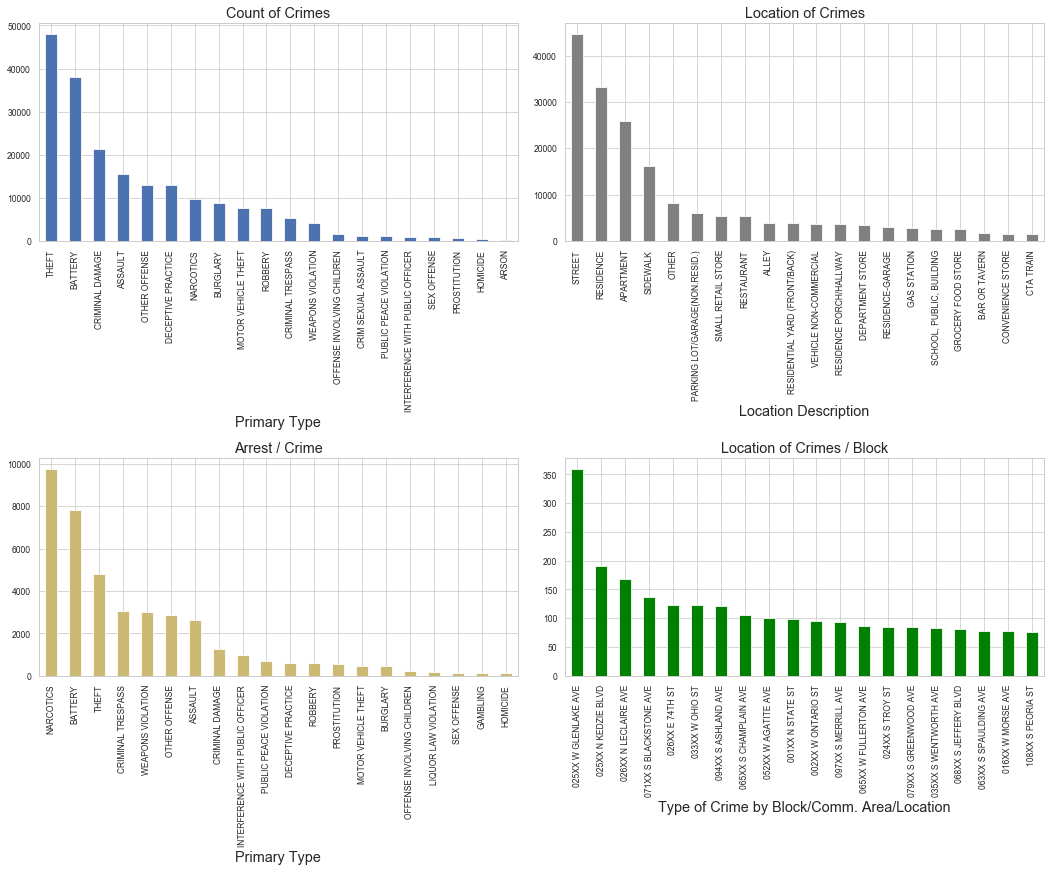

In [94]:
fig = plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = 1)
plt.subplots_adjust(wspace = 0.1)
#plt.tight_layout()
# Divide the figure into a 2x2 grid, and give me the first section
ax1 = fig.add_subplot(221)
ax1.tick_params(axis='both', which='major', labelsize=8.5)
ax2 = fig.add_subplot(222)
ax2.tick_params(axis='both', which='major', labelsize=8.5)
ax3 = fig.add_subplot(223)
ax3.tick_params(axis='both', which='major', labelsize=8.5)
ax4 = fig.add_subplot(224)
ax4.tick_params(axis='both', which='major', labelsize=8.5)

sns.set(style='whitegrid', rc={"grid.linewidth": 0.5})
sns.set_context("paper", font_scale=1.5) 

#Types of Crimes grouped by Primary Count
crimecount=df_small.groupby("Primary Type")["Primary Type"].count()
crimecount.sort_values(ascending=False, inplace=True)
crimecount = crimecount.head(20)
crimecount.plot(kind='bar',title="Count of Crimes", ax=ax1, rot=90)

#Types of Crimes by Location
crimeloc=df_small.groupby(["Location Description"])["Primary Type"].count()
crimeloc.sort_values(ascending=False, inplace=True)
crimeloc = crimeloc.head(20)
crimeloc.plot(kind='bar',title="Location of Crimes", ax=ax2, rot=90, color='gray')

#Crimes by Community Area
crimecom = (df_small.groupby(['Primary Type','Arrest'])
         .apply(lambda x: (x['Arrest']==True).sum())
         .reset_index(name='count'))
crimecom.sort_values(by=['count'], ascending=False, inplace=True)
crimecom=crimecom.head(20)
crimecom.set_index('Primary Type').plot(kind='bar',title="Arrest / Crime", ax=ax3, rot=90, color='y', legend=False)

#Types of Crimes by Location (['rank', 'discipline', 'sex'])
crimeloc=df_small.groupby(['Block', 'Community Area','Location Description'])['Primary Type'].count()
crimeloc.sort_values(ascending=False, inplace=True)
ax4.set_xlabel('Type of Crime by Block/Comm. Area/Location')
ax4.set_xticklabels(df_small.Block, fontsize=8.5)
crimeloc = crimeloc.head(20)
crimeloc.plot(kind='bar',title="Location of Crimes / Block", ax=ax4, rot=90, color='green')
ax4.set_xlabel('Type of Crime by Block/Comm. Area/Location')
ax4.set_xticklabels(df_small.Block, fontsize=8.5);

plt.savefig('multi-chart.jpg')

<Figure size 432x288 with 0 Axes>

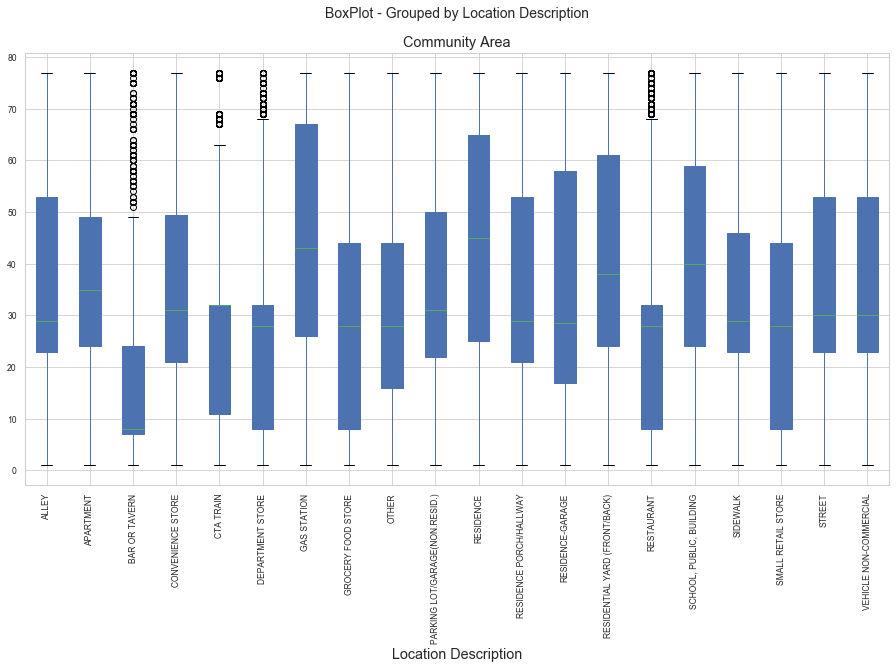

In [95]:
#BOXPLOT
plt.subplots_adjust(hspace = 0)
plt.subplots_adjust(wspace = 0)
crimedata=pd.read_csv("crimevisual.csv")
fig, ax = plt.subplots(1,figsize=(15,8))
crimedata.boxplot(column=['Community Area'], by='Location Description', ax=ax, fontsize=2, rot=90, patch_artist=True)
ax.tick_params(axis='both', which='major', labelsize=8.5)
fig.suptitle('BoxPlot - Grouped by Location Description', fontsize=14)
plt.savefig('BoxPlot.jpg')

In [9]:
#Drop the Columns Case Number, Domestic, Beat, Udated On and Arrest
df_small=df_small.drop(["Case Number", "Domestic", "Beat", "Updated On", "Arrest"], 1)

#Groupby Crime type and sort values to get a better understanding of the types of crimes
CrimesbyPT=df_small.groupby("Primary Type")["Primary Type"].count()
CrimesbyPT.sort_values(ascending=False, inplace=True)

In [10]:
#Create a variable crime list which has the top 25 crimes from the list generated above
CrimeList=CrimesbyPT.index.values[0:25].tolist()
df_small=df_small[df_small["Primary Type"].isin(CrimeList)]

#Remove Other Offense as it does not describe the exact crime
df_small=df_small[df_small["Primary Type"]!="OTHER OFFENSE"]

#We are interested in the severe crimes which are Arson, Assault, Battery, Crim Sexcual Assualt, Criminal Trespass, Homicide and Robbery
SevereCrimeList=["ARSON", "ASSAULT", "BATTERY", "CRIM SEXUAL ASSAULT", "CRIMINAL DAMAGE", "CRIMINAL TRESPASS", "HOMICIDE", "ROBBERY"]
#Create a new column called severe and add mark crimes that are Severe as 1 and all others as 0
df_small["severe"]=np.where(df_small['Primary Type'].isin(SevereCrimeList), 1, 0)
df_small.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe
1004707,11247820,03/05/2018 04:55:00 PM,021XX W 33RD ST,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,9.0,12.0,59.0,09,1162399.0,1882766.0,2018,41.833968,-87.679621,"(41.83396796, -87.67962074)",1
1023364,11274112,04/02/2018 06:42:00 AM,065XX S HONORE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENTIAL YARD (FRONT/BACK),7.0,15.0,67.0,08B,1165138.0,1861306.0,2018,41.775022,-87.670178,"(41.775021555, -87.670178246)",1
900494,11104829,10/01/2017 12:05:00 AM,010XX W BRYN MAWR AVE,0890,THEFT,FROM BUILDING,CONVENIENCE STORE,20.0,48.0,77.0,06,1168086.0,1937366.0,2017,41.983673,-87.657175,"(41.983673036, -87.657174571)",0
1167321,11469062,10/07/2018 12:45:00 AM,085XX S MANISTEE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,4.0,7.0,46.0,14,1195974.0,1848877.0,2018,41.740207,-87.557550,"(41.740207368, -87.557550253)",1
1102193,11380726,07/13/2018 10:00:00 PM,044XX N FRANCISCO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,17.0,33.0,14.0,05,1156249.0,1929299.0,2018,41.961785,-87.700928,"(41.961784919, -87.700928063)",0


In [11]:
#Lets see the size of the dataset we are dealing with now
print(st.wb + "Total Dataset After Round 1 of Processing:\t\t" + st.end + st.mag + "", df_small.shape)
reduction = (df_small.shape[0] / sample) * 100
reduction = 100 - reduction
reduction = "%.2f" % reduction
print(st.wb + "Data has been reduced by:\t\t\t\t" + st.end + st.mag + "", reduction, "%")

Total Dataset After Round 1 of Processing:		 (186818, 18)
Data has been reduced by:				 6.59 %


In [12]:
#Determine the locations of the crimes and sort them in a list
CrimeLocCount=df_small.groupby("Location Description")["Location Description"].count()
CrimeLocCount.sort_values(ascending=False, inplace=True)

In [13]:
#Filter data for the top 20 locations where crimes occur and update our Dataframe accordinly
CrimeLocation=CrimeLocCount.index.values[0:20].tolist()
df_small=df_small[df_small["Location Description"].isin(CrimeLocation)]
print(st.wb + "Dataset Shape when restricted to top 20 locations:\t" + st.end + st.mag + "", df_small.shape)
reduction = (df_small.shape[0] / sample) * 100
reduction = 100 - reduction
reduction = "%.2f" % reduction
print(st.wb + "Data has been reduced by:\t\t\t\t" + st.end + st.mag + "", reduction, "%")

Dataset Shape when restricted to top 20 locations:	 (166588, 18)
Data has been reduced by:				 16.71 %


#### Data Preprocessing

In [14]:
#Append D to the start of all Districts
df_small['District'] = df_small['District'].apply(lambda x: f"D{x}")

In [15]:
#make a temporary variable for district and primary type of crime after applying OneHotEncoding
df_temp=pd.get_dummies(df_small,columns=["Primary Type","District"])
#we will just make a copy here in case we need to use it in the future
df_temp=df_temp.join(df_small[["District","Primary Type"]])
print(st.wb + "Dataset Shape after applying OneHotEncoding:\t\t" + st.end + st.mag + "", df_temp.shape)
df_temp.head()

Dataset Shape after applying OneHotEncoding:		 (166588, 65)


,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D31.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type
1004707,11247820,03/05/2018 04:55:00 PM,021XX W 33RD ST,1020,BY FIRE,VEHICLE NON-COMMERCIAL,12.0,59.0,09,1162399.0,1882766.0,2018,41.833968,-87.679621,"(41.83396796, -87.67962074)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,ARSON
1023364,11274112,04/02/2018 06:42:00 AM,065XX S HONORE ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENTIAL YARD (FRONT/BACK),15.0,67.0,08B,1165138.0,1861306.0,2018,41.775022,-87.670178,"(41.775021555, -87.670178246)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,D7.0,BATTERY
900494,11104829,10/01/2017 12:05:00 AM,010XX W BRYN MAWR AVE,0890,FROM BUILDING,CONVENIENCE STORE,48.0,77.0,06,1168086.0,1937366.0,2017,41.983673,-87.657175,"(41.983673036, -87.657174571)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,D20.0,THEFT
1167321,11469062,10/07/2018 12:45:00 AM,085XX S MANISTEE AVE,1320,TO VEHICLE,STREET,7.0,46.0,14,1195974.0,1848877.0,2018,41.740207,-87.557550,"(41.740207368, -87.557550253)",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,D4.0,CRIMINAL DAMAGE
1102193,11380726,07/13/2018 10:00:00 PM,044XX N FRANCISCO AVE,0620,UNLAWFUL ENTRY,APARTMENT,33.0,14.0,05,1156249.0,1929299.0,2018,41.961785,-87.700928,"(41.961784919, -87.700928063)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D17.0,BURGLARY


In [16]:
%%time
#Format the data fields
from datetime import datetime
format = '%m/%d/%Y %I:%M:%S %p'
df_temp["time_24hour"]=df_temp.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H:%M"))
#Create 3 hour time blocks so better arrange data
df_temp["Timeblock"]=df_temp.Date.apply(lambda row: str(3*int(int(datetime.strptime(row, format).strftime("%H"))/3)))
df_temp['Date_no_time']=df_temp.Date.apply(lambda row: datetime.strptime(row, format).strftime("%Y%m%d"))
df_temp["Weekday"]=df_temp.Date.apply(lambda row: datetime.strptime(row, format).strftime("%A"))

#Apply OneHotEncoding on the Two Columns Timeblock and Weekday
df_temp=pd.get_dummies(df_temp,columns=["Timeblock","Weekday"])
df_chicago = df_temp
df_chicago = df_chicago.dropna()
print(st.wb + "Dataset Shape after applying OneHotEncoding:\t\t" + st.end + st.mag + "", df_chicago.shape)
df_chicago.head()

Dataset Shape after applying OneHotEncoding:		 (166588, 82)
Wall time: 12.4 s


,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D31.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
1004707,11247820,03/05/2018 04:55:00 PM,021XX W 33RD ST,1020,BY FIRE,VEHICLE NON-COMMERCIAL,12.0,59.0,09,1162399.0,1882766.0,2018,41.833968,-87.679621,"(41.83396796, -87.67962074)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D9.0,ARSON,16:55,20180305,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1023364,11274112,04/02/2018 06:42:00 AM,065XX S HONORE ST,0486,DOMESTIC BATTERY SIMPLE,RESIDENTIAL YARD (FRONT/BACK),15.0,67.0,08B,1165138.0,1861306.0,2018,41.775022,-87.670178,"(41.775021555, -87.670178246)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,D7.0,BATTERY,06:42,20180402,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
900494,11104829,10/01/2017 12:05:00 AM,010XX W BRYN MAWR AVE,0890,FROM BUILDING,CONVENIENCE STORE,48.0,77.0,06,1168086.0,1937366.0,2017,41.983673,-87.657175,"(41.983673036, -87.657174571)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,D20.0,THEFT,00:05,20171001,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1167321,11469062,10/07/2018 12:45:00 AM,085XX S MANISTEE AVE,1320,TO VEHICLE,STREET,7.0,46.0,14,1195974.0,1848877.0,2018,41.740207,-87.557550,"(41.740207368, -87.557550253)",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,D4.0,CRIMINAL DAMAGE,00:45,20181007,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1102193,11380726,07/13/2018 10:00:00 PM,044XX N FRANCISCO AVE,0620,UNLAWFUL ENTRY,APARTMENT,33.0,14.0,05,1156249.0,1929299.0,2018,41.961785,-87.700928,"(41.961784919, -87.700928063)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D17.0,BURGLARY,22:00,20180713,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


#### We will be using the Police Stations information as well to coorelate our crime data

In [17]:
#Read the plice stations file
police_df=pd.read_csv("Police_Stations.csv")

In [18]:
#get Chicago Latitute Longitute Information
chicago_lati = np.array(df_chicago["Latitude"])
chicago_longi = np.array(df_chicago["Longitude"])
chicago_lat_long = zip(chicago_lati, chicago_longi)
chicago_lat_long_list = list(chicago_lat_long)

#Get locations of police stations
latlong = ['LATITUDE', 'LONGITUDE']
stations_array = police_df.as_matrix(columns=latlong)
station_array = np.array (stations_array)
df_chicago["Location"] = chicago_lat_long_list

#### Calculating distance between particular crime location and its closest police station
###### We will use the Harvesine Formula to calculate the closest police station to each of the crime scenes in our dataset:

In [19]:
from math import radians, sin, cos, asin, sqrt, pi, atan2
import itertools
from timeit import Timer

distance = []
earth_radius_miles = 3956.0

x = df_chicago["Location"]
y = station_array 

def get_shortest_in(needle, haystack):
    # needle is a single (lat,long) tuple. haystack is a numpy array to find the point in that has the shortest distance to needle  
    
    dlat = np.radians(haystack[:,0]) - radians(needle[0])
    dlon = np.radians(haystack[:,1]) - radians(needle[1])
    a = np.square(np.sin(dlat/2.0)) + cos(radians(needle[0])) * np.cos(np.radians(haystack[:,0])) * np.square(np.sin(dlon/2.0))
    great_circle_distance = 2 * np.arcsin(np.minimum(np.sqrt(a), np.repeat(1, len(a))))
    d = earth_radius_miles * great_circle_distance
    return np.min(d)

def donumpy():
    get_shortest_in(x, y)
    
for i in x:
    distance.append(get_shortest_in(i, y))

In [20]:
df_chicago["closest_station"] = distance

In [21]:
#Export this CSV to use later for Visualizing
df_chicago.to_csv("crimevisual.csv", index=False)

#### We will be using Social Economic Data to coorelate our crime data

In [22]:
#import sociaeconomic data and set the hardship column to the index.
df_social = pd.read_csv("socioeconomic.csv")
df_social.head()

,HARDSHIP INDEX,COMMUNITY AREA NAME,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME
0,39.0,Rogers Park,23.6,18.2,8.7,27.5,23939
1,46.0,West Ridge,17.2,20.8,8.8,38.5,23040
2,20.0,Uptown,24.0,11.8,8.9,22.2,35787
3,17.0,Lincoln Square,10.9,13.4,8.2,25.5,37524
4,6.0,North Center,7.5,4.5,5.2,26.2,57123


In [23]:
%%time
df_chicago['HARDSHIP INDEX']=df_chicago["Community Area"].apply(lambda row: df_social.iloc[int(row)-1].iloc[0])
df_chicago["Income"]=df_chicago["Community Area"].apply(lambda row: df_social.iloc[int(row)-1].iloc[6])
df_chicago['Under18_over64']=df_chicago["Community Area"].apply(lambda row: df_social.iloc[int(row)-1].iloc[5])
df_chicago['Unemployed']=df_chicago["Community Area"].apply(lambda row: df_social.iloc[int(row)-1].iloc[4])
df_chicago['House_below_poverty']=df_chicago["Community Area"].apply(lambda row: df_social.iloc[int(row)-1].iloc[2])

Wall time: 1min 57s


In [24]:
print(st.wb + "Dataset Shape after applying creating new fields:\t\t" + st.end + st.red + "", df_chicago.shape)
df_chicago=df_chicago[df_chicago["Location Description"]!="OTHER"]
#One Hot Encodoming
df_chicago=pd.get_dummies(df_chicago,columns=["Location Description"])
print(st.wb + "Dataset Shape after applying OneHotEncoding on Location:\t" + st.end + st.red + "", df_chicago.shape)

Dataset Shape after applying creating new fields:		 (166588, 88)
Dataset Shape after applying OneHotEncoding on Location:	 (159436, 106)


In [25]:
df_chicago.head()

,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,...,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,HARDSHIP INDEX,Income,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
1004707,11247820,03/05/2018 04:55:00 PM,021XX W 33RD ST,1020,BY FIRE,12.0,59.0,09,1162399.0,1882766.0,2018,41.833968,-87.679621,"(41.83396796, -87.67962074)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,D9.0,ARSON,16:55,20180305,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.724876,61.0,16954,35.6,13.4,18.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1023364,11274112,04/02/2018 06:42:00 AM,065XX S HONORE ST,0486,DOMESTIC BATTERY SIMPLE,15.0,67.0,08B,1165138.0,1861306.0,2018,41.775022,-87.670178,"(41.775021555, -87.670178246)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,D7.0,BATTERY,06:42,20180402,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.574615,89.0,11317,40.7,35.9,34.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
900494,11104829,10/01/2017 12:05:00 AM,010XX W BRYN MAWR AVE,0890,FROM BUILDING,48.0,77.0,06,1168086.0,1937366.0,2017,41.983673,-87.657175,"(41.983673036, -87.657174571)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,D20.0,THEFT,00:05,20171001,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.327218,19.0,33385,23.8,9.2,18.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1167321,11469062,10/07/2018 12:45:00 AM,085XX S MANISTEE AVE,1320,TO VEHICLE,7.0,46.0,14,1195974.0,1848877.0,2018,41.740207,-87.557550,"(41.740207368, -87.55755025299999)",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,D4.0,CRIMINAL DAMAGE,00:45,20181007,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.296807,75.0,16579,41.1,19.7,29.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1102193,11380726,07/13/2018 10:00:00 PM,044XX N FRANCISCO AVE,0620,UNLAWFUL ENTRY,33.0,14.0,05,1156249.0,1929299.0,2018,41.961785,-87.700928,"(41.961784919, -87.70092806299999)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,D17.0,BURGLARY,22:00,20180713,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.294853,53.0,21323,3

In [26]:
df_chicago.to_csv("crimefinal.csv", index=False)

## Data Modelling

In [27]:
#Load the File Created above
data_large=pd.read_csv("crimefinal.csv")
df_model = data_large.sample(100000)
data_large = df_model
df_model.reset_index(inplace=True)
data_large.reset_index(inplace=True)
df_model.head()

,level_0,index,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,...,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,HARDSHIP INDEX,Income,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,0,113763,11670173,04/28/2019 11:30:00 PM,022XX N JANSSEN AVE,1320,TO VEHICLE,2.0,7.0,14,1166329.0,1914962.0,2019,41.922233,-87.664280,"(41.922233371, -87.664279746)",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,D18.0,CRIMINAL DAMAGE,23:30,20190428,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.695789,2.0,71551,21.5,5.1,12.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,24918,10855466,02/20/2017 09:34:00 AM,069XX S VERNON AVE,0470,RECKLESS CONDUCT,6.0,69.0,24,1180448.0,1859066.0,2017,41.768537,-87.614123,"(41.768537094, -87.614122885)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,D3.0,PUBLIC PEACE VIOLATION,09:34,20170220,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.455151,66.0,17285,41.0,23.0,29.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2590,10821675,01/19/2017 10:10:00 PM,105XX S WENTWORTH AVE,0560,SIMPLE,34.0,49.0,08A,1176819.0,1834900.0,2017,41.702305,-87.628151,"(41.70230503, -87.628150654)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,D5.0,ASSAULT,22:10,20170119,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.386932,52.0,17949,41.2,20.3,19.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,47651,11630029,03/21/2019 02:00:00 AM,055XX W RACE AVE,0820,$500 AND UNDER,37.0,25.0,06,1139323.0,1902766.0,2019,41.889301,-87.763806,"(41.889301428, -87.76380630700001)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,D15.0,THEFT,02:00,20190321,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.675339,73.0,15957,37.9,22.6,28.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,58909,11453430,09/21/2018 09:21:00 AM,059XX W AUGUSTA BLVD,0486,DOMESTIC BATTERY SIMPLE,29.0,25.0,08B,1136404.0,1906051.0,2018,41.898369,-87.774448,"(41.898368554, -87.77444765899999)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,D15.0,BATTERY,09:21,20180921,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1.302701,73.0,15957,37.9,22

In [28]:
#drop unnecessary columns
df_model=df_model.drop(["ID","Date","Block","IUCR","Description","Ward","Community Area","FBI Code"], axis=1)
df_model=df_model.drop(["X Coordinate","Y Coordinate","Year","Location","District","Primary Type","time_24hour","Date_no_time"], axis=1)
cols=list(df_model.columns.values)
#drop all columns that start with Primary Type
droplist=[]
for i in cols:
    if i.startswith("Primary Type"):
        droplist.append(i)
df_model=df_model.drop(droplist, axis=1)
print(st.wb + "Dataset Shape after dropping non required columns:\t" + st.end + st.red + "", df_model.shape)
df_model.head()

Dataset Shape after dropping non required columns:	 (100000, 68)


,level_0,index,Latitude,Longitude,severe,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D31.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,HARDSHIP INDEX,Income,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,0,113763,41.922233,-87.664280,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.695789,2.0,71551,21.5,5.1,12.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,24918,41.768537,-87.614123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.455151,66.0,17285,41.0,23.0,29.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2590,41.702305,-87.628151,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.386932,52.0,17949,41.2,20.3,19.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,47651,41.889301,-87.763806,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.675339,73.0,15957,37.9,22.6,28.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,58909,41.898369,-87.774448,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1.302701,73.0,15957,37.9,22.6,28.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Prepare for training and testing

In [29]:
#Prepare for doing training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

itrain, itest = train_test_split(range(df_model.shape[0]), train_size=0.7)
mask=np.ones(df_model.shape[0], dtype='int')
#Specify training and testing parameters
mask[itrain]=1
mask[itest]=0
mask=(mask==1)
df_model=df_model.dropna()
np.nan_to_num(df_model)

print(st.wb + "Dataset Shape:\t" + st.end + st.red + "", df_model.shape)

Dataset Shape:	 (100000, 68)


In [30]:
#We have a list of continuous features, or in other words standardizable variables
STANDARDIZABLE=["Latitude", "Longitude","closest_station","House_below_poverty","Unemployed","Under18_over64","Income","HARDSHIP INDEX"]

#Also create a list for indicator variable. We can do this by excluding the above continuous features from total features. 
INDICATOR=list(df_model.columns)

#We need to remove the response variable from our total list of features
INDICATOR.remove(u'severe')

In [31]:
#Standardize training set
df_model.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(df_model.loc[mask,STANDARDIZABLE])

#Standardize test set
df_model.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(df_model.loc[~mask,STANDARDIZABLE])

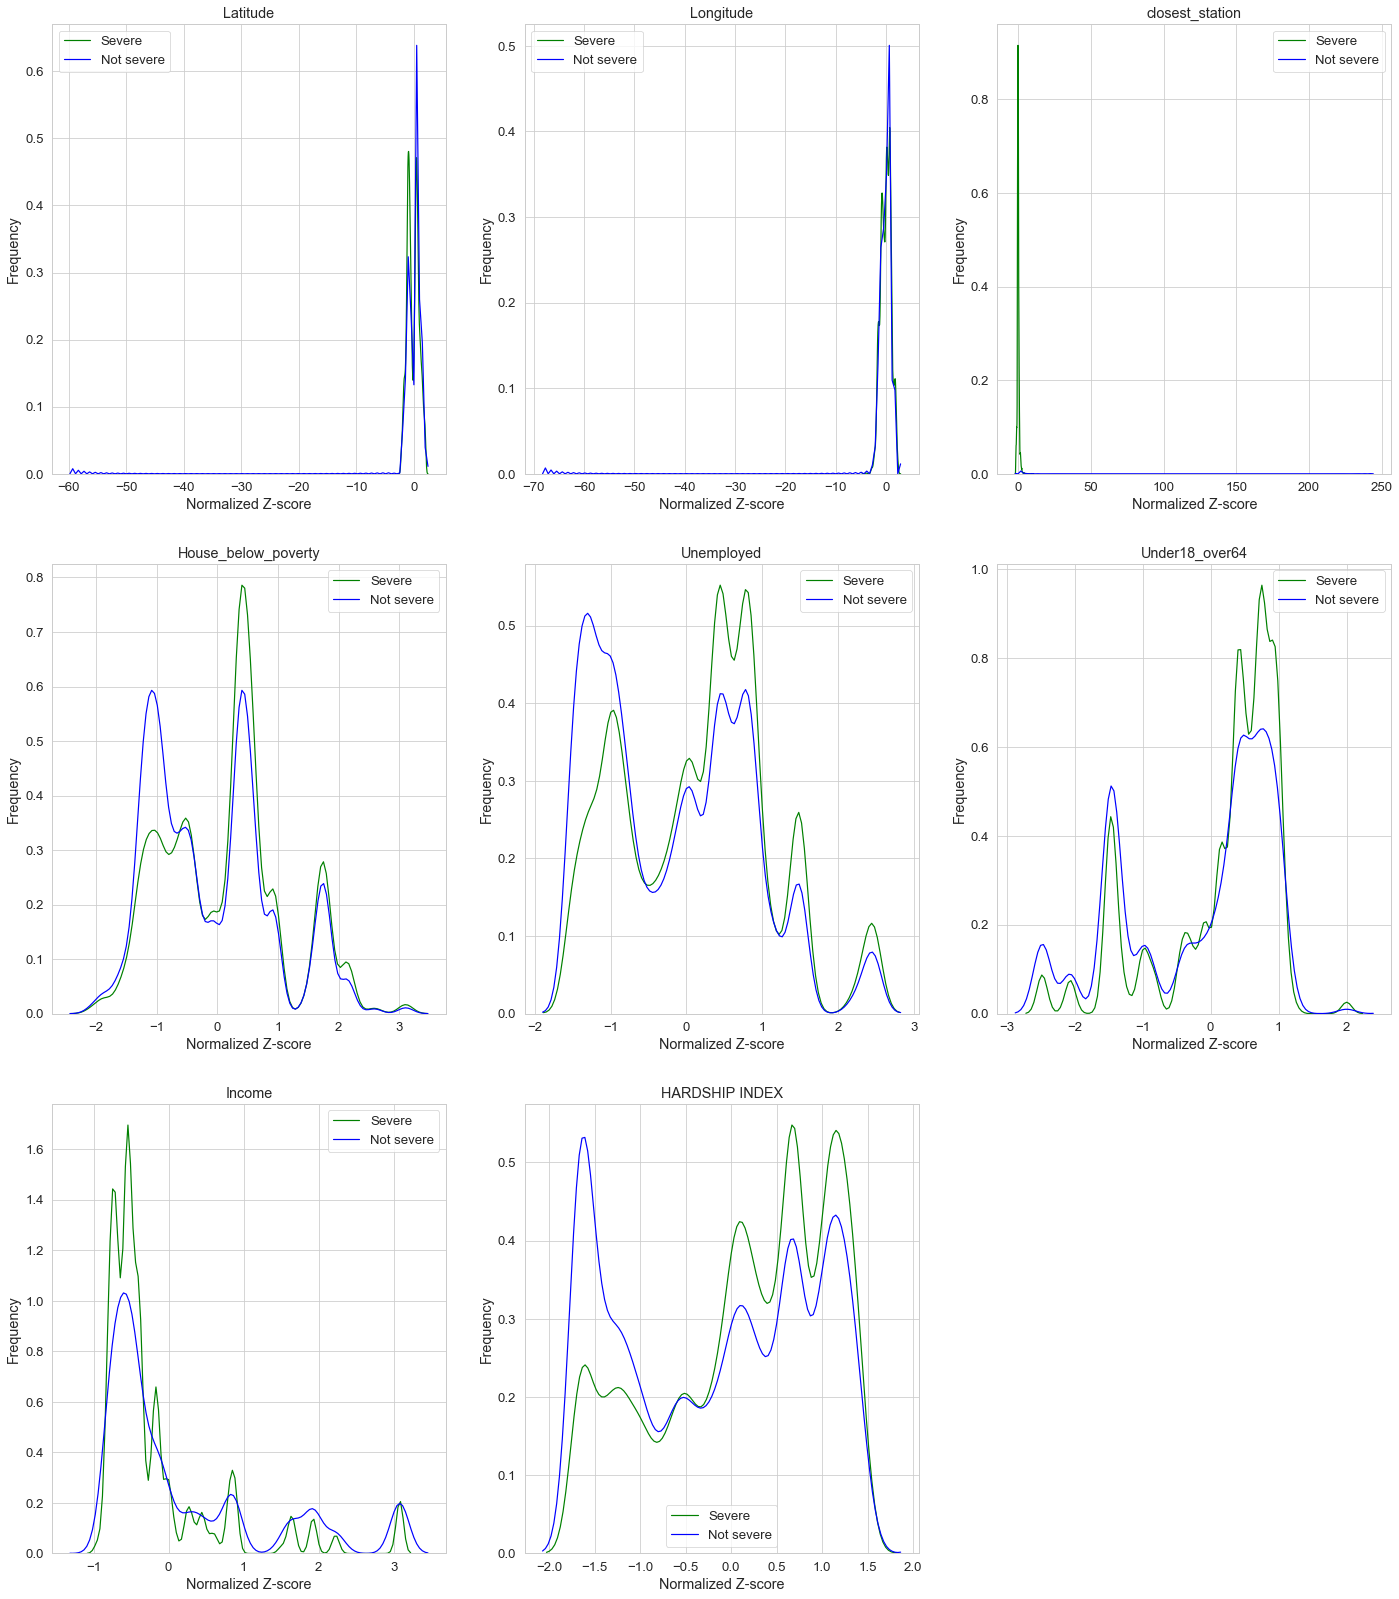

In [32]:
fig=plt.figure(figsize=(24,48))
pos=df_model[df_model["severe"]==1]
neg=df_model[df_model["severe"]==0]
for k in range (8):
    ax=fig.add_subplot(5,3,k+1)    
    #sns.set(font_scale=1.5)
    sns.kdeplot(pos[STANDARDIZABLE[k]],color="green",label="Severe")
    sns.kdeplot(neg[STANDARDIZABLE[k]],color="blue",label="Not severe")
    ax.set_title(STANDARDIZABLE[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")
plt.savefig('zScores.jpg')

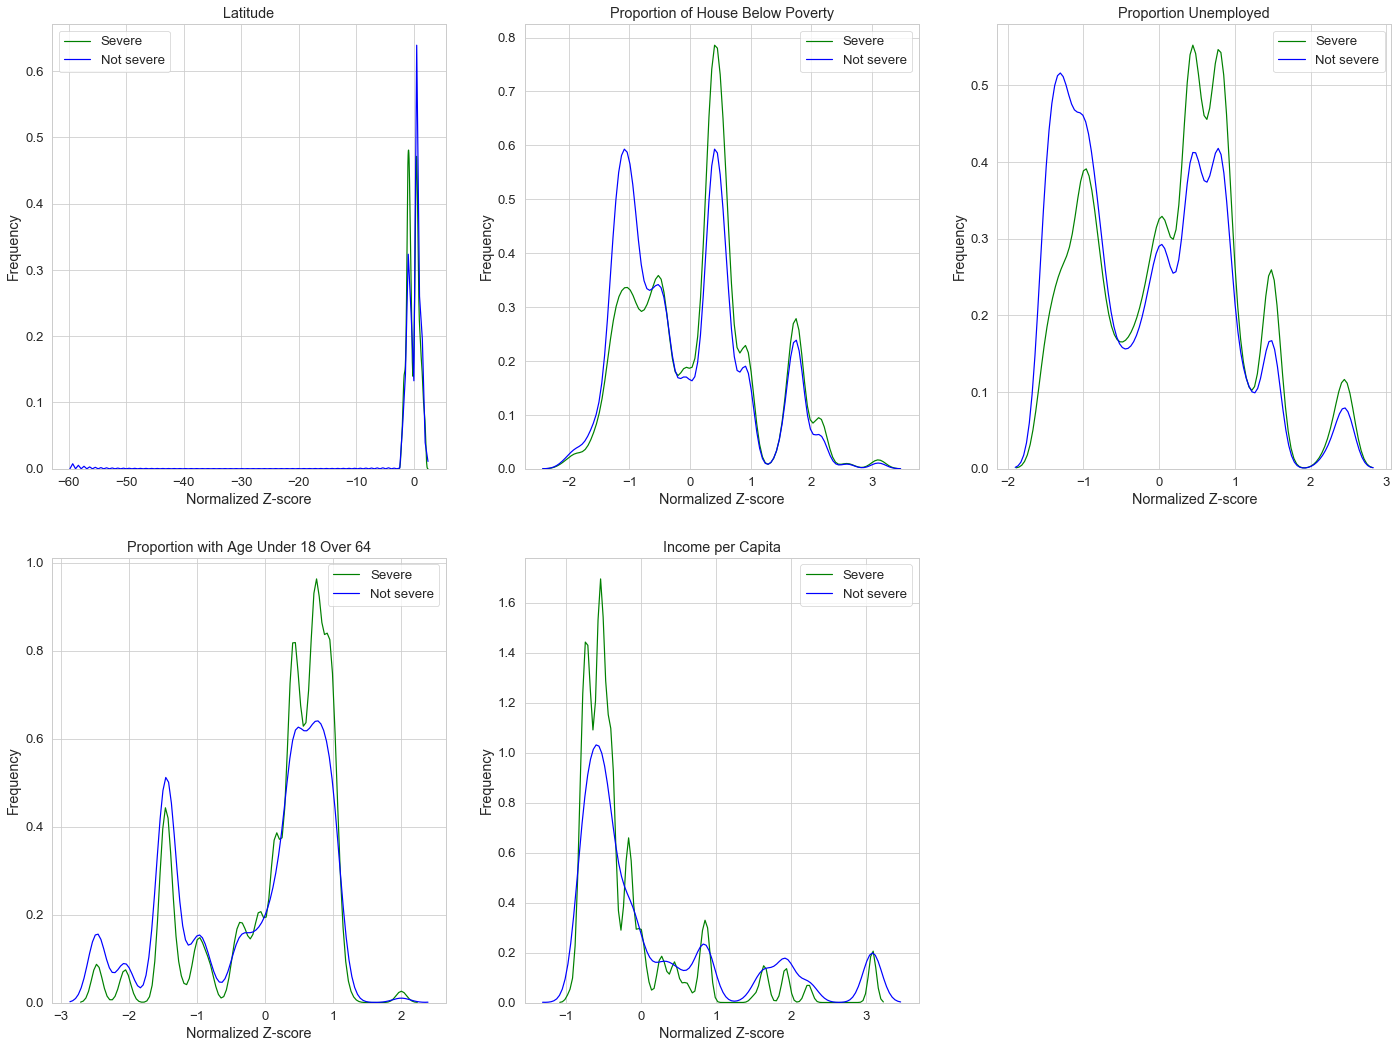

In [33]:
#The following plot those continuous features with significant effects (for presentation purpose)
plotlist=["Latitude","House_below_poverty","Unemployed","Under18_over64","Income"]
plotlist_title=["Latitude","Proportion of House Below Poverty","Proportion Unemployed", "Proportion with Age Under 18 Over 64", "Income per Capita"]
fig=plt.figure(figsize=(24,18))
for k in range (5):
    ax=fig.add_subplot(2,3,k+1)    
    sns.kdeplot(pos[plotlist[k]],color="green",label="Severe")
    sns.kdeplot(neg[plotlist[k]],color="blue",label="Not severe")
    ax.set_title(plotlist_title[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")
plt.savefig('zScores1.jpg')

##### Heat Map

In [34]:
df_crimeheat = df_chicago
threshold = 3550 # Anything that occurs less than this will be removed.
value_counts = df_crimeheat['Primary Type'].value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <= threshold].index
df_crimeheat.replace(to_remove, np.nan, inplace=True)

In [35]:
#Splitting the Date to Day, Month, Year, Hour, Min, Sec
df_crimeheat['date2'] = pd.to_datetime(df_crimeheat['Date'])
df_crimeheat['Hour'] = df_crimeheat['date2'].dt.hour
df_crimeheat.drop(['date2'], axis=1, inplace=True) 
df_crimeheat = df_crimeheat.pivot_table('Primary Type', aggfunc='count', columns='Hour', index=df_crimeheat['Primary Type'], fill_value=0)
df_crimeheat[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]] = df_crimeheat[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].apply(lambda x: (x/x.sum())*100, axis=1)

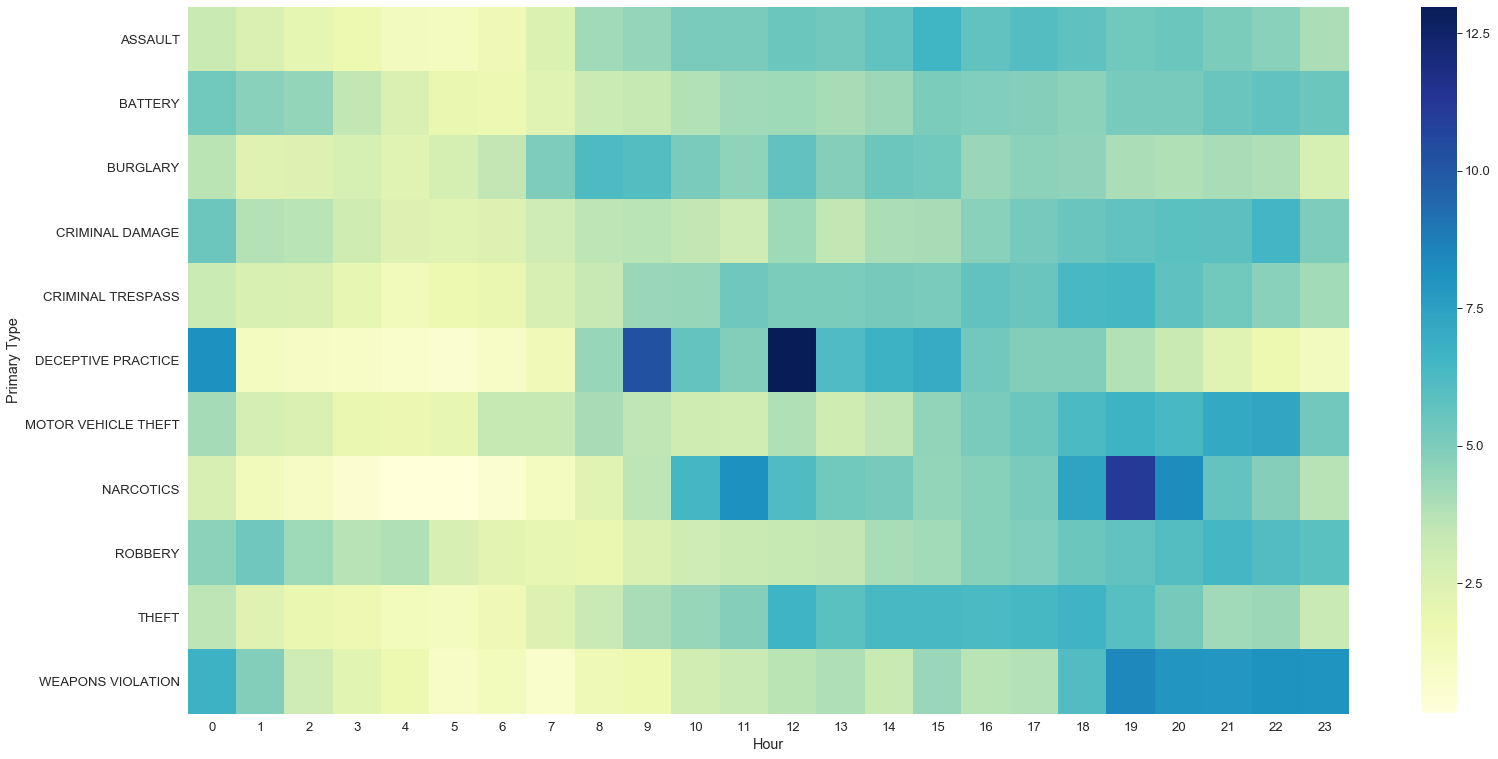

In [36]:
plt.figure(figsize=(26,13))
annot_kws = {"va": 'top', "size": 14}
sns.heatmap(df_crimeheat,  cmap='YlGnBu', annot_kws=annot_kws)
plt.savefig('heatmap.jpg')

##### Yearly Line Plots

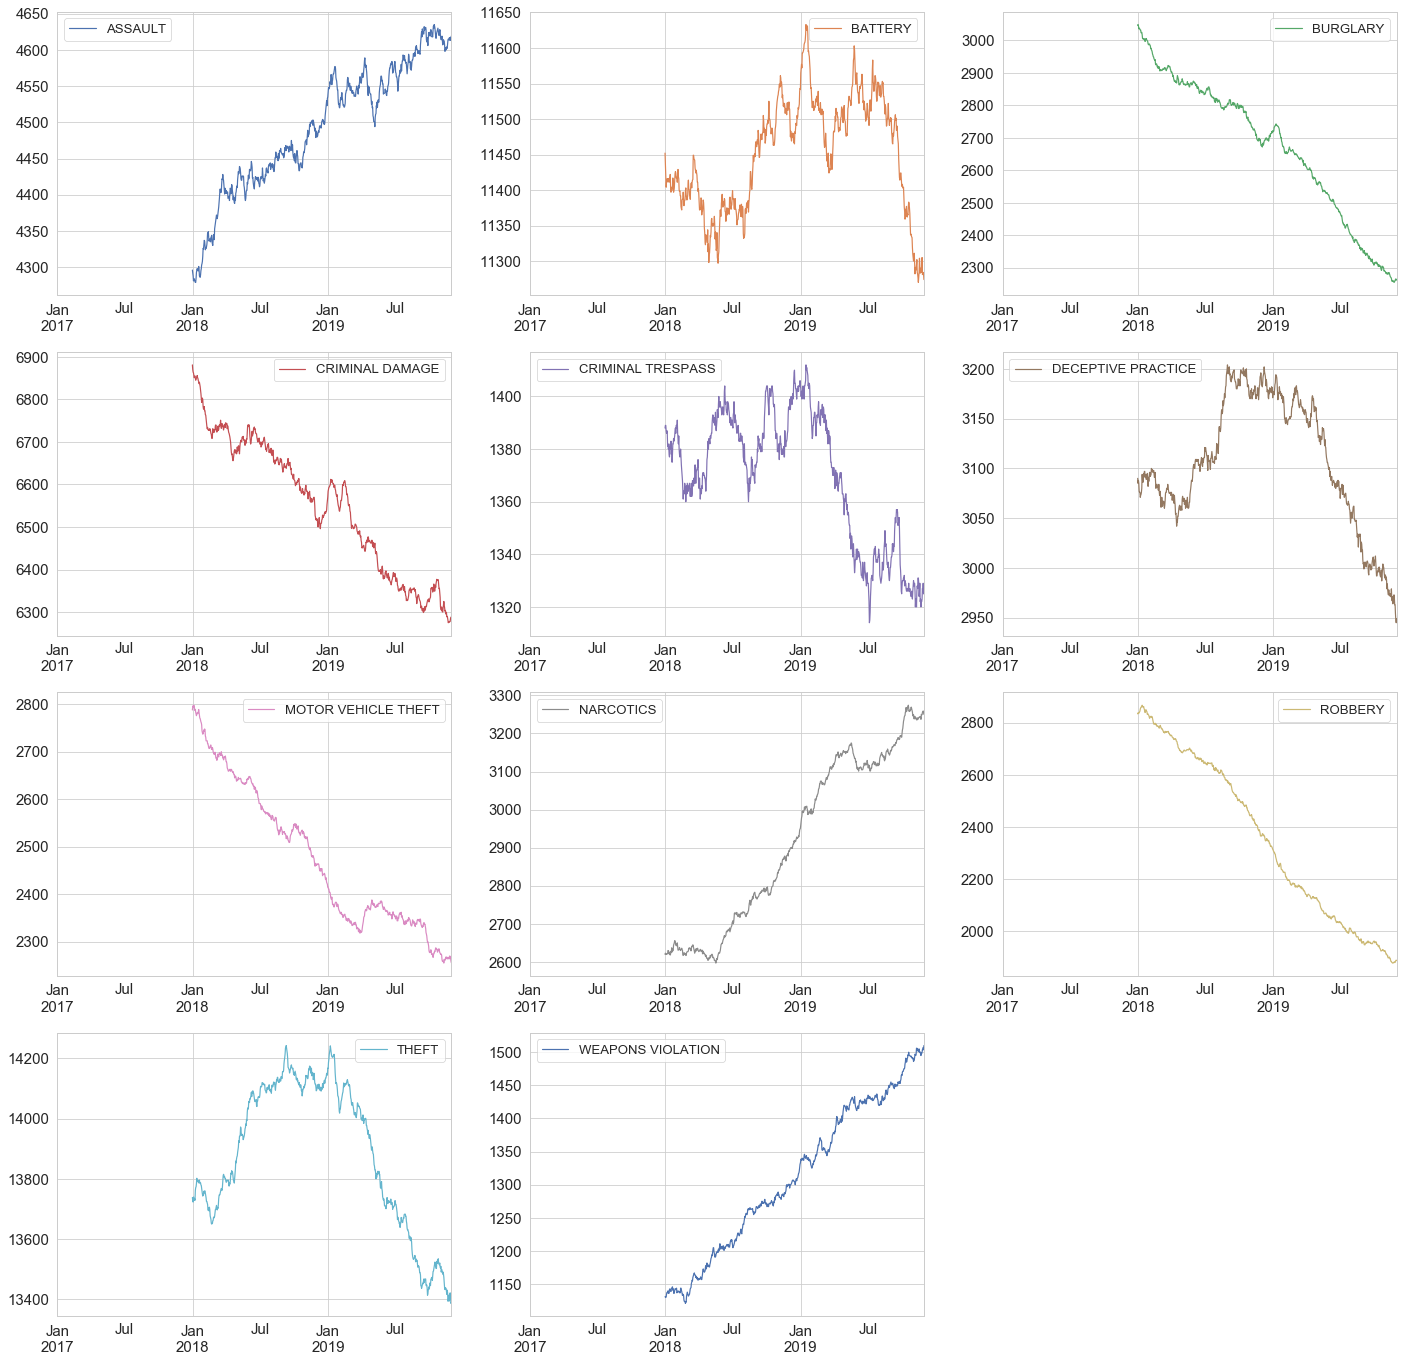

In [37]:
df_lineplot = df_chicago
df_lineplot.Date = pd.to_datetime(df_lineplot.Date, format='%m/%d/%Y %I:%M:%S %p')
df_lineplot.index = pd.DatetimeIndex(df_lineplot.Date)
crimes_count_date = df_lineplot.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df_lineplot.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
#pd.Series(accuracy_dict1).plot(kind="bar",title="Test accuracy",width=0.5, color="red")
lineplot = crimes_count_date.rolling(365).sum().plot(figsize=(24, 24), subplots=True, layout=(-1, 3), sharex=False, sharey=False ,fontsize=15, rot=0)
plt.savefig('crimeyear.jpg')

#### Model 0 - Baseline Model

In [38]:
pos=df_model[df_model['severe']==1]
neg=df_model[df_model['severe']==0]
percent_severe="%.2f" % (float(len(pos))/len(df_model)*100)
percent_non_severe="%.2f" % (float(len(neg))/len(df_model)*100)
print(st.wb + "Severe crimes:\t\t" + st.end + st.mag + "", percent_severe)
print(st.wb + "Non Severe crimes:\t" + st.end + st.mag + "", percent_non_severe)

Severe crimes:		 48.87
Non Severe crimes:	 51.13


In [39]:
#Let's make a dictionary storing confusion matrix for all the algorithms, so that we can have some comparison
confusion_dict={}
confusion_dict["Baseline_model"]=np.asarray([[len(neg),0],[len(pos),0]])
#Also create a dictionary to store all the models
model_dict={}
#The following dict will store the accuracy for training set
accuracy_dict={}
#The following dict will store the accuracy for test set
accuracy_dict1={}

train_not_severe_percent = 1-float(sum(df_model["severe"].values[mask]))/len(df_model["severe"].values[mask])
train_not_severe_percent = "%.2f" % (float((train_not_severe_percent) * 100))
test_not_severe_percent= 1-float(sum(df_model["severe"].values[~mask]))/len(df_model["severe"].values[~mask])
test_not_severe_percent = "%.2f" % float((test_not_severe_percent) * 100)
print(st.wb + "Not severe incident based on train data: \t" + st.end + st.mag + "", train_not_severe_percent)
print(st.wb + "Not severe incident based on test data: \t" + st.end + st.mag + "", test_not_severe_percent)
accuracy_dict["Baseline_model"]=train_not_severe_percent
accuracy_dict1["Baseline_model"]=test_not_severe_percent

Not severe incident based on train data: 	 51.31
Not severe incident based on test data: 	 50.70


#### Create Functions that we will use to run Models

In [40]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
total_features=INDICATOR
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = "%.2f" % float((clf.score(Xtrain, ytrain)) * 100)
    test_accuracy =  "%.2f" % float((clf.score(Xtest, ytest)) * 100)
    print(st.wb + "Training accuracy: \t" + st.end + st.mag + "", training_accuracy)
    print(st.wb + "Test accuracy: \t\t" + st.end + st.mag + "", test_accuracy, st.end)
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, confmatrix, training_accuracy, test_accuracy

In [41]:
#reference: hw3 cv_optimize function
#we will use five fold validation by default
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

#### Model 1 - Logistic regression with Lasso-based feature selection

In [42]:
%%time
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l2")
clflog, Xtrain, ytrain, Xtest, ytest, confclflog, training_accuracy, test_accuracy=do_classify(clflog, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 40.0, 70.0, 100.0]}, df_model, total_features, u'severe', 1, mask=mask)
confusion_dict["Logistic"]=confclflog
model_dict["Logistic"]=clflog
accuracy_dict["Logistic"]=training_accuracy
accuracy_dict1["Logistic"]=test_accuracy

Training accuracy: 	 62.21
Test accuracy: 		 62.21 
[[9487 5723]
 [5615 9175]]
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Wall time: 1min 12s


#### Model 2 - Linear SVM

In [43]:
%%time
from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="squared_hinge")
clfsvm, Xtrain, ytrain, Xtest, ytest, confclfsvm, training_accuracy, test_accuracy= do_classify(clfsvm, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 50, 100.0]}, df_model, total_features, u'severe',1, mask=mask)
confusion_dict["svm"]=confclfsvm
model_dict["svm"]=clfsvm
accuracy_dict["svm"]=training_accuracy
accuracy_dict1["svm"]=test_accuracy

Training accuracy: 	 62.15
Test accuracy: 		 62.29 
[[9473 5737]
 [5575 9215]]
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Wall time: 3min 22s


#### Model 3 - Decision Trees

In [44]:
%%time
from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
clfdt, Xtrain, ytrain, Xtest, ytest, confclfdt, training_accuracy, test_accuracy = do_classify(clfdt, {"max_depth":np.arange(1,20,2)}, df_model, total_features, u'severe',1, mask=mask)
confusion_dict["decision tree"]=confclfdt
model_dict["decision tree"]=clfdt
accuracy_dict["decision tree"]=training_accuracy
accuracy_dict1["decision tree"]=test_accuracy

Training accuracy: 	 61.26
Test accuracy: 		 60.16 
[[10470  4740]
 [ 7213  7577]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Wall time: 33.2 s


#### Model 4 - Naive Bayes model

In [45]:
%%time
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()
clfgnb, Xtrain, ytrain, Xtest, ytest, confgnb, training_accuracy, test_accuracy=do_classify(clfgnb, None, df_model, total_features, u'severe',1, mask=mask)
confusion_dict["Naive Bayes"]=confgnb
model_dict["Naive Bayes"]=clfgnb
accuracy_dict["Naive Bayes"]=training_accuracy
accuracy_dict1["Naive Bayes"]=test_accuracy

Training accuracy: 	 60.30
Test accuracy: 		 58.02 
[[11356  3854]
 [ 8739  6051]]
GaussianNB(priors=None, var_smoothing=1e-09)
Wall time: 616 ms


#### Model 5 - Random Forest

In [46]:
%%time
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()
clfrdf, Xtrain, ytrain, Xtest, ytest, confrdf, training_accuracy, test_accuracy=do_classify(randf, {"n_estimators":[10, 20, 30, 40, 100]}, df_model, total_features, u'severe',1, mask=mask)
confusion_dict["Random forest"]=confrdf
model_dict["Random forest"]=clfrdf
accuracy_dict["Random forest"]=training_accuracy
accuracy_dict1["Random forest"]=test_accuracy

Training accuracy: 	 100.00
Test accuracy: 		 61.38 
[[9656 5554]
 [6032 8758]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Wall time: 2min 38s


#### Model 6 - KNN

In [47]:
%%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh, Xtrain1, ytrain1, Xtest1, ytest1, confknn, training_accuracy, test_accuracy=do_classify(neigh, {"n_neighbors":[5, 10, 20, 40]}, df_model, total_features, u'severe',1, mask=mask)
confusion_dict["KNN"]=confknn
model_dict["KNN"]=neigh
accuracy_dict["KNN"]=training_accuracy
accuracy_dict1["KNN"]=test_accuracy
#convert dictionary items to float
for k, v in accuracy_dict.items():
    accuracy_dict[k] = float(v)
for k, v in accuracy_dict1.items():
    accuracy_dict1[k] = float(v)

Training accuracy: 	 64.92
Test accuracy: 		 61.97 
[[10241  4969]
 [ 6439  8351]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')
Wall time: 45min 17s


#### Compare ALL Single Class Models

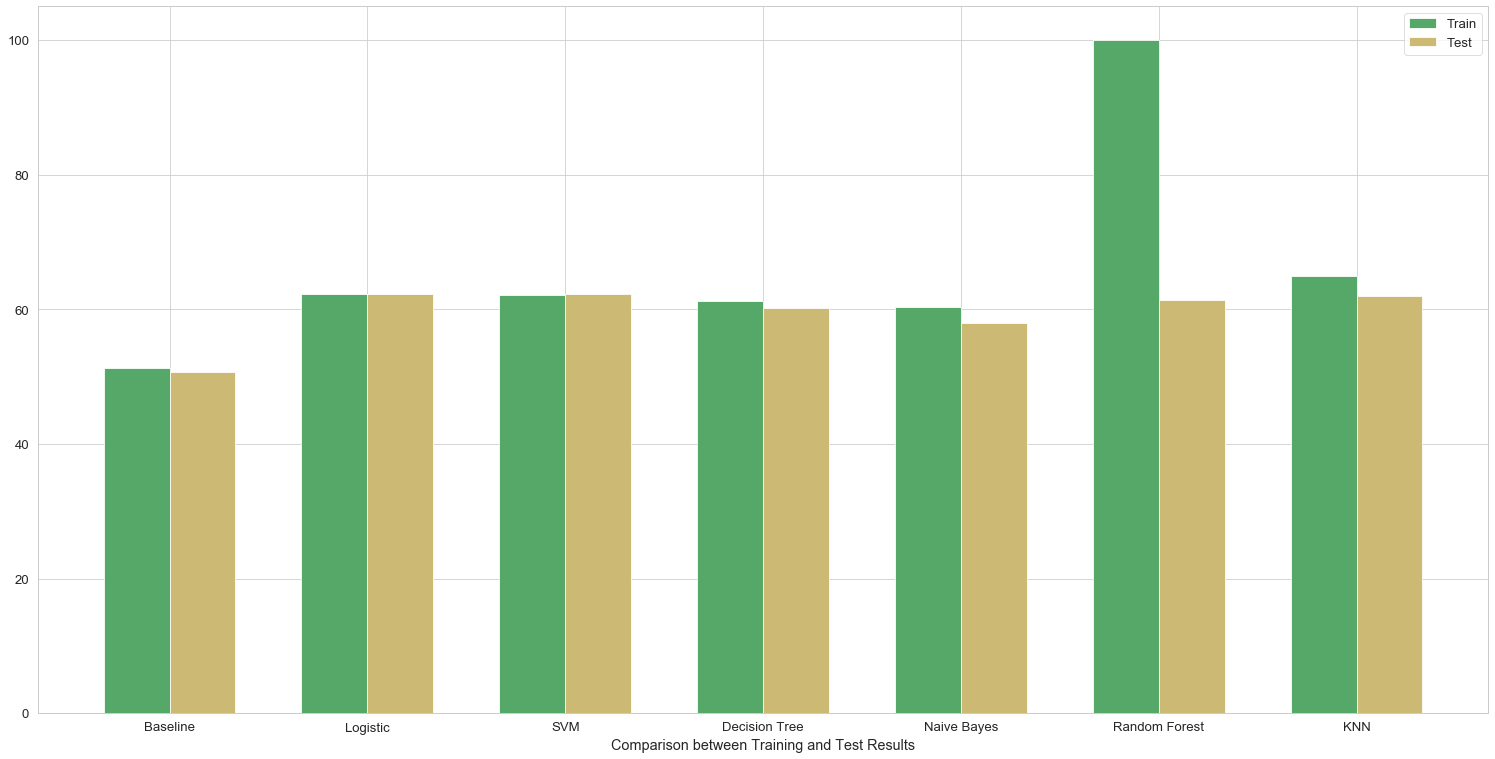

<Figure size 432x288 with 0 Axes>

In [48]:
testdata = accuracy_dict.values()
traindata = accuracy_dict1.values()

indices = range(len(testdata))
#names = list(accuracy_dict.keys())
names = ['Test', 'Baseline', 'Logistic', 'SVM', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN']

# Calculate optimal width
width = np.min(np.diff(indices))/3

fig = plt.figure(figsize=(26,13))
ax = fig.add_subplot(111)
ax.bar(indices-width/2.,testdata,width,color='g',label='Train')
ax.bar(indices+width/2.,traindata,width,color='y',label='Test')
tiks = ax.get_xticks().tolist()
ax.axes.set_xticklabels(names)
ax.set_xlabel('Comparison between Training and Test Results')
ax.legend()
plt.show()
plt.savefig('SingleClass.jpg')

### Multiclass classificationm for CRIME TYPES

In [49]:
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=total_features, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort_values('abscoef', ascending=False)
lasso_importances=nonzero_lasso(clflog)

In [50]:
df_multi = data_large.sample(100000)
df_multi = data_large.drop(["ID","Date","Block","IUCR","Description","Ward","Community Area","FBI Code","severe"], axis=1)
df_multi = df_multi.drop(["X Coordinate","Y Coordinate","Year","Location","District","time_24hour","Date_no_time"], axis=1)
#np.nan_to_num(data2)
df_multi = df_multi.fillna(df_multi.mean())
df_multi.head()

,level_0,index,Latitude,Longitude,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D31.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,HARDSHIP INDEX,Income,Under18_over64,Unemployed,House_below_poverty,Location Description_ALLEY,Location Description_APARTMENT,Location Description_BAR OR TAVERN,Location Description_CONVENIENCE STORE,Location Description_CTA TRAIN,Location Description_DEPARTMENT STORE,Location Description_GAS STATION,Location Description_GROCERY FOOD STORE,Location Description_PARKING LOT/GARAGE(NON.RESID.),Location Description_RESIDENCE,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,0,113763,41.922233,-87.664280,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.695789,2.0,71551,21.5,5.1,12.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,24918,41.768537,-87.614123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,PUBLIC PEACE VIOLATION,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.455151,66.0,17285,41.0,23.0,29.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2590,41.702305,-87.628151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,ASSAULT,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.386932,52.0,17949,41.2,20.3,19.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,47651,41.889301,-87.763806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THEFT,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.675339,73.0,15957,37.9,22.6,28.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,58909,41.898369,-87.774448,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BATTERY,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1.302701,73.0,15957,37.9,22.6,28.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [51]:
#FOUR Crimes we are INTERESTED IN
#THEFT, BATTERY, NARCOTICS, CRIMINAL DAMAGE
df_multi["Crime_interested"]=df_multi["Primary Type_THEFT"]+df_multi["Primary Type_BATTERY"]+df_multi["Primary Type_NARCOTICS"]+df_multi["Primary Type_CRIMINAL DAMAGE"]
#only maintain the four specific crime types we are interested in classifying
df_multi=df_multi[df_multi["Crime_interested"]==1]

In [52]:
def get_categorical_integer(row):
    if row=="THEFT":
        return int(0)
    elif row=="BATTERY":
        return int(1)
    elif row=="CRIMINAL DAMAGE":
        return int(2)
    elif row=="NARCOTICS":
        return int(3)

#Assign each of the crime type an integer identifier. We will input these integer identifier directly for the algorithms below.
df_multi["category"]=df_multi["Primary Type"].apply(get_categorical_integer)

In [53]:
#Previously we dropped rows that are not in the four types, which mess up the integer index of the dataframe
#here we reset the integer index. This is required for the mask to work.
df_multi = df_multi.reset_index(drop=True)

#### Create Functions that we will use to run Models

In [54]:
from sklearn.preprocessing import MinMaxScaler

def do_classify2(clf, parameters, indf, featurenames,targetname, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    scaler=MinMaxScaler()
    X = scaler.fit_transform(X)
    y=indf[targetname]
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
   
    training_accuracy = "%.2f" % float((clf.score(Xtrain, ytrain)) * 100)
    test_accuracy =  "%.2f" % float((clf.score(Xtest, ytest)) * 100)
    print(st.wb + "Training accuracy: \t" + st.end + st.mag + "", training_accuracy)
    print(st.wb + "Test accuracy: \t\t" + st.end + st.mag + "", test_accuracy, st.end)
    
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy

In [55]:
mask=np.ones(df_multi.shape[0], dtype='int')
itrain, itest = train_test_split(range(df_multi.shape[0]), train_size=0.7)
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [56]:
#Standardize training set
df_multi.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(df_multi.loc[mask,STANDARDIZABLE])
#Standardize test set
df_multi.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(df_multi.loc[~mask,STANDARDIZABLE])

##### Analyze Data for Primary Type Theft

In [57]:
train_theft_percent="%.2f" % (float(sum(df_multi["Primary Type_THEFT"].values[mask]))/len(df_multi["Primary Type_THEFT"].values[mask])*100)
test_theft_percent="%.2f" % (float(sum(df_multi["Primary Type_THEFT"].values[~mask]))/len(df_multi["Primary Type_THEFT"].values[~mask])*100)

print(st.wb + "Training theft percent:\t" + st.end + st.mag + "", train_theft_percent)
print(st.wb + "Test theft percent:\t" + st.end + st.mag + "", test_theft_percent)

accuracy_multi_train={}
accuracy_multi_test={}
accuracy_multi_train["Baseline model"]=train_theft_percent
accuracy_multi_test["Baseline model"]=test_theft_percent

Training theft percent:	 39.39
Test theft percent:	 39.88


##### Model 1: Decision tree for Multiclass

In [58]:
%%time
#total_features.remove(u'index')
from sklearn.tree import DecisionTreeClassifier
clfdt_multi=DecisionTreeClassifier()
clfdt_multi, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clfdt_multi, {"max_depth":np.arange(1,20,2)}, df_multi, total_features, "category", mask=mask)
accuracy_multi_train["Decision tree multiclass"]=training_accuracy
accuracy_multi_test["Decision tree multiclass"]=test_accuracy

Training accuracy: 	 54.23
Test accuracy: 		 54.62 
[[6228 1341    0   35]
 [2362 3813    0  168]
 [2313 1228    0    4]
 [ 931  271    0  374]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Wall time: 18.4 s


##### Model 2: Random forest for Multiclass

In [59]:
%%time
from sklearn.ensemble import RandomForestClassifier
randfmulti=RandomForestClassifier()
randfmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(randfmulti, {"n_estimators":[10, 20, 30, 40, 100]}, df_multi, total_features, "category", mask=mask)
accuracy_multi_train["Random forest multiclass"]=training_accuracy
accuracy_multi_test["Random forest multiclass"]=test_accuracy

Training accuracy: 	 100.00
Test accuracy: 		 54.39 
[[5194 1712  560  138]
 [1560 4025  508  250]
 [1440 1381  624  100]
 [ 337  542  168  529]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Wall time: 1min 30s


##### Model 3: Logistic regression for Multiclass - Newton

In [60]:
%%time
from sklearn.linear_model import LogisticRegression
clflogmulti=LogisticRegression(penalty="l2",multi_class='multinomial',solver="newton-cg",max_iter=100)
clflogmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, df_multi, total_features, 'category', mask=mask)
accuracy_multi_train["Logistic - newton cg"]=training_accuracy
accuracy_multi_test["Logistic - newton cg"]=test_accuracy

Training accuracy: 	 56.94
Test accuracy: 		 56.95 
[[5404 1594  423  183]
 [1460 4318  273  292]
 [1519 1398  490  138]
 [ 389  390  150  647]]
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Wall time: 7min 13s


##### Model 4: Logistic regression for Multiclass - lbfgs

In [61]:
%%time
from sklearn.linear_model import LogisticRegression
clflogmulti2 = LogisticRegression(penalty="l2",multi_class='multinomial',solver="lbfgs",max_iter=400)
clflogmulti2, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti2, {"C": [0.01, 0.1, 1.0, 10.0]}, df_multi, total_features, 'category', mask=mask)
accuracy_multi_train["Logistic - lbfgs"]=training_accuracy
accuracy_multi_test["Logistic - lbfgs"]=test_accuracy
for k, v in accuracy_multi_train.items():
    accuracy_multi_train[k] = float(v)
for k, v in accuracy_multi_test.items():
    accuracy_multi_test[k] = float(v)

Training accuracy: 	 56.85
Test accuracy: 		 56.86 
[[5410 1577  424  193]
 [1482 4299  271  291]
 [1538 1386  481  140]
 [ 385  389  150  652]]
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Wall time: 1min 39s


#### Compare ALL MultiClass Models

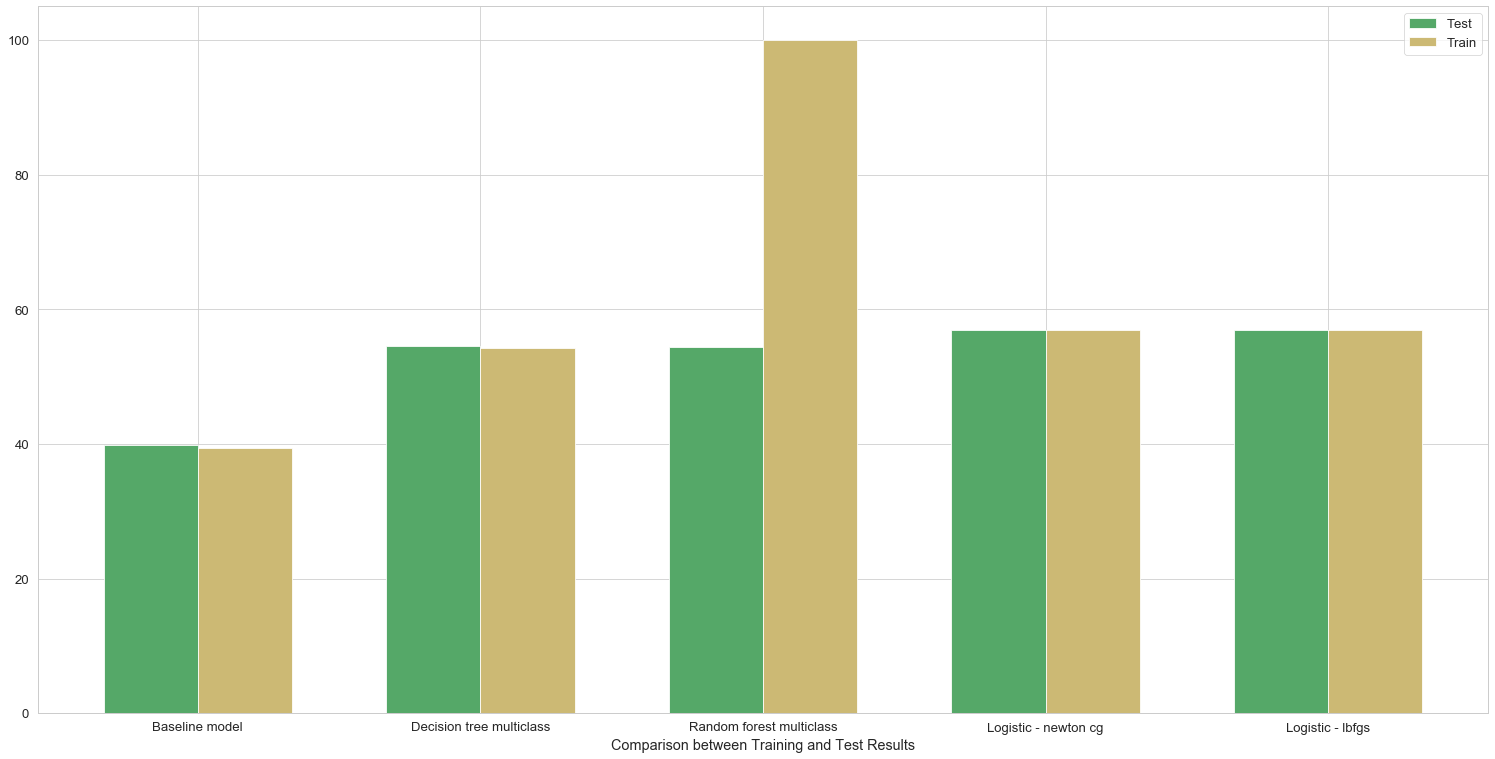

<Figure size 432x288 with 0 Axes>

In [62]:
testdata = accuracy_multi_test.values()
traindata = accuracy_multi_train.values()

indices = range(len(testdata))
#names = list(accuracy_dict.keys())
names = ['','Baseline model', 'Decision tree multiclass', 'Random forest multiclass', 'Logistic - newton cg', 'Logistic - lbfgs']

# Calculate optimal width
width = np.min(np.diff(indices))/3

fig = plt.figure(figsize=(26,13))
ax = fig.add_subplot(111)
ax.bar(indices-width/2.,testdata,width,color='g',label='Test')
ax.bar(indices+width/2.,traindata,width,color='y',label='Train')
tiks = ax.get_xticks().tolist()
ax.axes.set_xticklabels(names)
ax.set_xlabel('Comparison between Training and Test Results')
ax.legend()
plt.show()
plt.savefig('MultiClass.jpg')

### NEURAL NETWORK

In [63]:
#Preprocess data for Neural Network
df_neural = df_small
df_neural = df_neural.dropna()
df_neural = df_neural.drop(['ID'],axis=1)

In [64]:
%%time
#Splitting the Date to Day, Month, Year, Hour, Min, Sec
df_neural['date2'] = pd.to_datetime(df_neural['Date'])
df_neural['Year'] = df_neural['date2'].dt.year
df_neural['Month'] = df_neural['date2'].dt.month
df_neural['Day'] = df_neural['date2'].dt.day
df_neural['Hour'] = df_neural['date2'].dt.hour
df_neural['Minute'] = df_neural['date2'].dt.minute
df_neural['Second'] = df_neural['date2'].dt.second 
df_neural = df_neural.drop(['Date'], axis=1) 
df_neural = df_neural.drop(['date2'], axis=1) 

Wall time: 18.7 s


In [65]:
# Convert Categorical Attributes to Numerical
df_neural['Block'] = pd.factorize(df_neural["Block"])[0]
df_neural['IUCR'] = pd.factorize(df_neural["IUCR"])[0]
df_neural['Description'] = pd.factorize(df_neural["Description"])[0]
df_neural['Location Description'] = pd.factorize(df_neural["Location Description"])[0]
df_neural['FBI Code'] = pd.factorize(df_neural["FBI Code"])[0]
df_neural['Location'] = pd.factorize(df_neural["Location"])[0] 
df_neural.head()

,Block,IUCR,Primary Type,Description,Location Description,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Month,Day,Hour,Minute,Second
1004707,0,0,ARSON,0,0,D9.0,12.0,59.0,0,1162399.0,1882766.0,2018,41.833968,-87.679621,0,1,3,5,16,55,0
1023364,1,1,BATTERY,1,1,D7.0,15.0,67.0,1,1165138.0,1861306.0,2018,41.775022,-87.670178,1,1,4,2,6,42,0
900494,2,2,THEFT,2,2,D20.0,48.0,77.0,2,1168086.0,1937366.0,2017,41.983673,-87.657175,2,0,10,1,0,5,0
1167321,3,3,CRIMINAL DAMAGE,3,3,D4.0,7.0,46.0,3,1195974.0,1848877.0,2018,41.740207,-87.557550,3,1,10,7,0,45,0
1102193,4,4,BURGLARY,4,4,D17.0,33.0,14.0,4,1156249.0,1929299.0,2018,41.961785,-87.700928,4,0,7,13,22,0,0


In [66]:
#Group the crime types that have a small number to data is not very skewed
Target = 'Primary Type'
all_classes = df_neural.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)

df_neural.loc[df_neural['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

In [67]:
#Get a list odf_neural the unique crime types and set them as our Classes
Classes = df_neural['Primary Type'].unique()

#Converty Primary Type into Catogorical Variables
df_neural['Primary Type'] = pd.factorize(df_neural["Primary Type"])[0] 
df_neural['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [68]:
#Correlation with output variable
cor = df_neural.corr()
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Primary Type    1.000000
FBI Code        0.553644
Name: Primary Type, dtype: float64

In [69]:
Features = ["IUCR", "Description", "FBI Code"]

#### Run Neural Network

In [70]:
%%time
# Create Model with configuration 
accuracy_neural={}
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#random states
rstates = [1,100,1000]
solvers = ['adam','lbfgs','sgd']
iters = [5,20]

for solve in solvers:
    for itr in iters:
        for rs in rstates:
            nn_model = MLPClassifier(solver=solve, alpha=0.000001, hidden_layer_sizes=(150,100,50), random_state=rs, max_iter=itr)
            x, y = train_test_split(df_neural, test_size = 0.2, random_state= 100)
            xTrain = x[Features]    #Features to train
            xTest = x[Target]      #Target Class to train
            yTrain = y[Features]    #Features to test
            yTest = y[Target]      #Target Class to test
            
            nn_model.fit(X=xTrain, y=xTest)
            
            #Prediction
            result = nn_model.predict(y[Features]) 

            ac_sc = accuracy_score(yTest, result)
            arraypos = solve + " rs" + str(rs) + " it" + str(itr)
            accuracy_neural[arraypos] = ac_sc
            print("Current Run:\tSolver:",solve," RS:",rs, " IT:",itr)

Current Run:	Solver: adam  RS: 1  IT: 5
Current Run:	Solver: adam  RS: 100  IT: 5
Current Run:	Solver: adam  RS: 1000  IT: 5
Current Run:	Solver: adam  RS: 1  IT: 20
Current Run:	Solver: adam  RS: 100  IT: 20
Current Run:	Solver: adam  RS: 1000  IT: 20
Current Run:	Solver: lbfgs  RS: 1  IT: 5
Current Run:	Solver: lbfgs  RS: 100  IT: 5
Current Run:	Solver: lbfgs  RS: 1000  IT: 5
Current Run:	Solver: lbfgs  RS: 1  IT: 20
Current Run:	Solver: lbfgs  RS: 100  IT: 20
Current Run:	Solver: lbfgs  RS: 1000  IT: 20
Current Run:	Solver: sgd  RS: 1  IT: 5
Current Run:	Solver: sgd  RS: 100  IT: 5
Current Run:	Solver: sgd  RS: 1000  IT: 5
Current Run:	Solver: sgd  RS: 1  IT: 20
Current Run:	Solver: sgd  RS: 100  IT: 20
Current Run:	Solver: sgd  RS: 1000  IT: 20
Wall time: 4min 35s


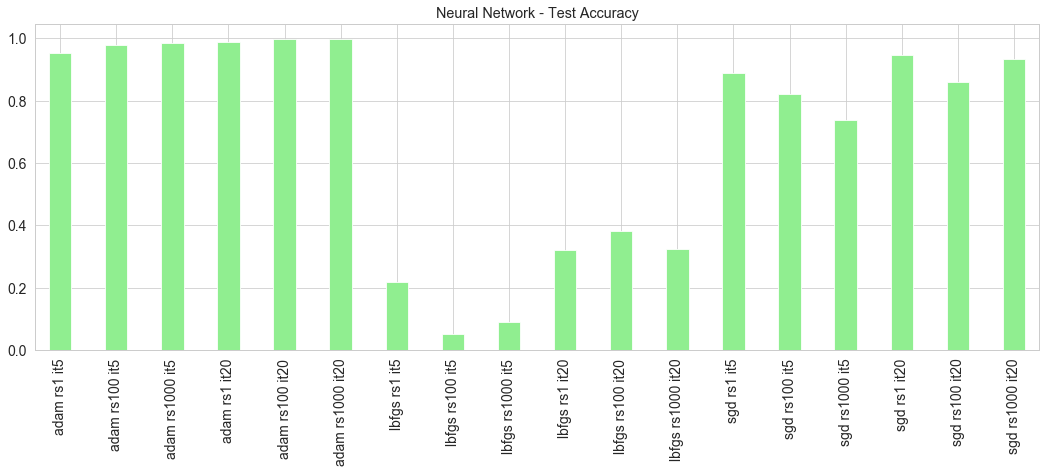

In [71]:
neuraldf = pd.DataFrame([accuracy_neural])
neuraldf = neuraldf.transpose() 
neuraldf.rename(columns={0:'value'}, inplace=True)

#Compare the Neural Networks
from matplotlib import cm
pd.Series(accuracy_neural).plot(cmap='hsv',kind="bar",title="Neural Network - Test Accuracy",width=0.4,color="lightgreen", fontsize=14, figsize=(18,6))
plt.savefig('NeuralNet.jpg')

### Principal Component Analysis

In [72]:
from matplotlib import*
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca = df_chicago

In [73]:
df_pca = df_pca[['ID','Primary Type','Block','Community Area','closest_station','HARDSHIP INDEX','Income','Unemployed','Under18_over64','House_below_poverty']]
#df_pca['Location Description'] = pd.factorize(df_pca["Location Description"])[0]
df_pca['Primary Type'] = pd.factorize(df_pca["Primary Type"])[0]
df_pca.head()

,ID,Primary Type,Block,Community Area,closest_station,HARDSHIP INDEX,Income,Unemployed,Under18_over64,House_below_poverty
Date,,,,,,,,,,
2018-03-05 16:55:00,11247820,-1,021XX W 33RD ST,59.0,1.724876,61.0,16954,13.4,35.6,18.7
2018-04-02 06:42:00,11274112,0,065XX S HONORE ST,67.0,0.574615,89.0,11317,35.9,40.7,34.4
2017-10-01 00:05:00,11104829,1,010XX W BRYN MAWR AVE,77.0,1.327218,19.0,33385,9.2,23.8,18.2
2018-10-07 00:45:00,11469062,2,085XX S MANISTEE AVE,46.0,2.296807,75.0,16579,19.7,41.1,29.8
2018-07-13 22:00:00,11380726,3,044XX N FRANCISCO AVE,14.0,1.294853,53.0,21323,10.0,32.0,19.2


In [74]:
M = df_pca.pivot_table(index=['Unemployed'], columns=['Block'], values='Primary Type')

In [75]:
df_pca1 = M.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df_pca1)

In [76]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [77]:
%%time
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

Wall time: 1h 57min 59s


In [78]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1095.1828739231346
1026.3428271627445
926.8427521687033
882.4135887686215
804.6345479070881
774.5784631810839
751.4964082525466
684.1782752446118
665.4842121985454
578.551941518274
569.3888184392595
549.0306202779021
541.9235356805256
529.6956447824653
500.5676245270459
497.5266739869608
492.19894449847425
485.328276124409
479.06089897520405
477.63507243098854
472.00292568982576
470.62925337091235
468.3959010587321
460.5380925709966
443.4878443713438
423.07236016731525
400.1673288291678
385.3630379487615
370.56321471106645
350.45109206033595
338.14375977276745
329.7851287879087
317.84100658581826
307.1798405385382
305.9590869335086
292.6812877338716
278.4345271993436
267.407344888189
263.0799196993696
255.34233426335138
245.87105437138774
244.86558080586164
244.64920592480908
234.77776749183963
226.94442360536127
211.29694596609502
199.96438852028797
195.36305805970807
182.20723583316607
171.07568334554549
163.19221159420053
158.21641042809463
153.74902

5.290347445119931e-29
5.290347445119931e-29
5.0064855461059694e-29
5.0064855461059694e-29
5.102782423780942e-29
5.102782423780942e-29
4.936657485268865e-29
4.936657485268865e-29
5.066982857370379e-29
5.066982857370379e-29
4.7895584238026726e-29
4.7895584238026726e-29
4.736255667323221e-29
4.736255667323221e-29
4.679680897560352e-29
4.679680897560352e-29
4.7556321560202236e-29
4.7556321560202236e-29
4.7142232614191625e-29
4.7142232614191625e-29
4.6524265442453754e-29
4.6524265442453754e-29
4.6400638758956395e-29
4.6400638758956395e-29
4.607698882178279e-29
4.607698882178279e-29
4.5687916453455147e-29
4.5687916453455147e-29
4.46678010164887e-29
4.46678010164887e-29
4.4976867423097227e-29
4.4976867423097227e-29
4.427985393418278e-29
4.427985393418278e-29
4.4168792955264376e-29
4.4168792955264376e-29
4.422338905302519e-29
4.422338905302519e-29
4.3479922788885975e-29
4.3479922788885975e-29
4.432431375989618e-29
4.432431375989618e-29
4.349812504257878e-29
4.349812504257878e-29
4.321107080860

5.767747512714005e-56
5.471317271993727e-56
5.471317271993727e-56
5.384263836118504e-56
5.384263836118504e-56
5.278664428350643e-56
5.278664428350643e-56
4.6232493119353325e-56
4.6232493119353325e-56
4.178615749723106e-56
4.178615749723106e-56
4.166313134689188e-56
4.166313134689188e-56
4.265625673124809e-56
4.265625673124809e-56
4.116233201804409e-56
4.116233201804409e-56
3.923056108760435e-56
3.923056108760435e-56
3.9772528254618637e-56
3.9772528254618637e-56
3.9911056309085687e-56
3.9911056309085687e-56
3.898324883750535e-56
3.898324883750535e-56
3.8549788768477655e-56
3.8549788768477655e-56
3.760392225068812e-56
3.760392225068812e-56
3.652190346795609e-56
3.652190346795609e-56
3.616484253518945e-56
3.616484253518945e-56
3.5742550287592547e-56
3.5742550287592547e-56
3.526855012021288e-56
3.526855012021288e-56
3.5198983907329513e-56
3.5198983907329513e-56
3.322249043031347e-56
3.322249043031347e-56
3.355427111599206e-56
3.1877653383158305e-56
3.1877653383158305e-56
3.1541266419086774

8.080764241410252e-75
7.868525325972854e-75
7.868525325972854e-75
7.422705651567384e-75
7.422705651567384e-75
6.872016364736237e-75
6.872016364736237e-75
6.798875885955318e-75
6.798875885955318e-75
6.842923023803632e-75
6.842923023803632e-75
6.643200758058585e-75
6.643200758058585e-75
6.050055425862388e-75
5.729925589581793e-75
5.729925589581793e-75
5.709905131530371e-75
5.709905131530371e-75
5.653406106308159e-75
5.653406106308159e-75
5.508513091226821e-75
5.508513091226821e-75
5.435705419016609e-75
5.435705419016609e-75
5.106805685109256e-75
5.106805685109256e-75
4.89912231978836e-75
4.89912231978836e-75
4.774525312189336e-75
4.774525312189336e-75
4.438227592407908e-75
4.438227592407908e-75
4.0884776285706233e-75
4.0884776285706233e-75
4.077675312718829e-75
4.077675312718829e-75
3.973156446643324e-75
3.8094816687674133e-75
3.742969646917373e-75
3.742969646917373e-75
3.4554590834095377e-75
3.4554590834095377e-75
3.45465230381128e-75
3.45465230381128e-75
3.4060805131581026e-75
3.406080

3.0052508837637077e-102
2.9762190945321556e-102
2.9762190945321556e-102
2.9067479684643922e-102
2.9067479684643922e-102
2.7448825878693634e-102
2.7448825878693634e-102
2.3924757076705346e-102
2.3924757076705346e-102
2.370145543381639e-102
2.259367493610629e-102
2.259367493610629e-102
2.2451990978520694e-102
2.2451990978520694e-102
1.9732380561872246e-102
1.9732380561872246e-102
1.7617992410076054e-102
1.7617992410076054e-102
1.72744474783723e-102
1.72744474783723e-102
1.6044097820309813e-102
1.6044097820309813e-102
1.5526570583824949e-102
1.5526570583824949e-102
1.5317250706360141e-102
1.445742596502178e-102
1.445742596502178e-102
1.3665972807378997e-102
1.3665972807378997e-102
1.4244483049847058e-102
1.3424730922751614e-102
1.1449275167366777e-102
1.1449275167366777e-102
1.1213437926068455e-102
1.1213437926068455e-102
1.0642495927973878e-102
1.0642495927973878e-102
1.1610503112015028e-102
9.748429426924528e-103
9.748429426924528e-103
1.1164190324994434e-102
9.335291358943722e-103
9.33

3.79355468911117e-138
3.79355468911117e-138
3.5622292315518886e-138
3.5622292315518886e-138
3.463095264530097e-138
3.463095264530097e-138
3.349387988971795e-138
3.1853174492482914e-138
3.1853174492482914e-138
2.9781208718837804e-138
2.9781208718837804e-138
2.8807552231307236e-138
2.7936198883084383e-138
2.7936198883084383e-138
2.554381556594625e-138
2.554381556594625e-138
2.3350999719557135e-138
2.2808572214121835e-138
2.2808572214121835e-138
2.1858697073704763e-138
2.1858697073704763e-138
1.9820456839480533e-138
1.8348462507422952e-138
1.8348462507422952e-138
1.785260770960556e-138
1.785260770960556e-138
1.7560575721486597e-138
1.6460879893830572e-138
1.6460879893830572e-138
1.6067142317854476e-138
1.6067142317854476e-138
1.6027879138558153e-138
1.6027879138558153e-138
1.5680039074493443e-138
1.5680039074493443e-138
1.5235139636898646e-138
1.5235139636898646e-138
1.4006387729269323e-138
1.36168743124722e-138
1.36168743124722e-138
1.3604454574067042e-138
1.1777415113888412e-138
1.17774

4.4511400261336025e-178
4.4132242662400647e-178
4.4132242662400647e-178
4.5703272949845906e-178
4.5703272949845906e-178
4.3424943910175584e-178
4.3424943910175584e-178
4.489602322345598e-178
4.341237288850573e-178
3.842417197755367e-178
3.842417197755367e-178
3.3084456915511753e-178
3.3084456915511753e-178
3.17108295559554e-178
3.17108295559554e-178
2.8327600078476523e-178
2.8327600078476523e-178
2.6750902896307366e-178
2.6750902896307366e-178
2.4950281523824265e-178
2.4950281523824265e-178
2.11561054743436e-178
2.11561054743436e-178
1.970505266452715e-178
1.970505266452715e-178
1.7971685465040978e-178
1.693679817819628e-178
1.693679817819628e-178
1.4132495835555585e-178
1.4132495835555585e-178
1.364570052786301e-178
1.283501290925421e-178
1.283501290925421e-178
1.225385256178514e-178
1.192513336227321e-178
1.192513336227321e-178
1.1636449269781618e-178
1.1636449269781618e-178
1.1506366889650669e-178
1.1506366889650669e-178
1.1444552341867388e-178
1.0836503228183062e-178
1.083650322818

1.375577537826642e-235
1.078695994668263e-235
1.078695994668263e-235
1.094153440876381e-235
1.094153440876381e-235
1.0975149563974478e-235
1.0975149563974478e-235
1.0379396297989156e-235
1.0379396297989156e-235
1.0535705502997023e-235
9.320126401832305e-236
9.320126401832305e-236
8.658915137845268e-236
7.711644890082798e-236
7.711644890082798e-236
7.039565392412129e-236
7.039565392412129e-236
6.7864993904094855e-236
6.7864993904094855e-236
5.114009693152764e-236
5.114009693152764e-236
5.028263646209489e-236
5.028263646209489e-236
4.4016507309596955e-236
4.163920251446363e-236
4.163920251446363e-236
3.5928279483840286e-236
3.5928279483840286e-236
3.3401299409461173e-236
3.3401299409461173e-236
3.1510378687805065e-236
3.1510378687805065e-236
3.034199455766153e-236
3.034199455766153e-236
2.6637953716927177e-236
2.6637953716927177e-236
2.5074232564295055e-236
2.5074232564295055e-236
2.606808639312036e-236
2.606808639312036e-236
2.366397123302613e-236
2.366397123302613e-236
2.22895123289191

5.08994851601008e-309
1.71604269366761e-309
1.106237379088767e-309
1.007642238274625e-309
4.63096550200343e-309
4.8517917702642e-310
6.4042667465895e-310
4.4895630335594e-309
3.20686187582486e-309
2.61844190856283e-309
4.13577847715744e-309
4.67632566447087e-310
2.804384261634385e-309
2.3819851510965e-309
3.11196824647201e-309
1.11393731661334e-310
5.33324357954285e-310
1.36752030681744e-309
2.56252879736342e-309
3.67774149147674e-309
8.76215150586653e-310
1.53723664664118e-309
1.413512883277606e-309
2.94654506139117e-310
1.756704437126e-310
5.56752161292617e-310
1.08747494438241e-309
4.022581528903095e-309
2.294240035399115e-309
1.09747041887572e-309
1.44787249167441e-309
1.01492515716511e-309
5.9212202850625e-310
1.40736816984147e-310
5.2388604354997e-310
3.822829152428e-311
1.76208314029826e-310
1.165962107677514e-309
2.39366246445776e-310
7.4999934949164e-310
1.22759272804615e-310
7.53868459556457e-310
6.83332204647765e-310
5.3516587021045e-310
1.4334911151208e-310
5.7298939061644e

1.24e-322
2.87e-322
1.6e-322
3.1e-322
9.4e-323
5e-323
4.84e-322
1.43e-322
7.4e-323
3.5e-323
1.14e-322
8e-323
5.93e-322
2.5e-322
6.4e-323
4.5e-322
4e-323
3.2e-322
6e-323
7e-323
3.26e-322
2.03e-322
2.37e-322
1.83e-322
6.47e-322
1.1e-322
7.56e-322
4.05e-322
3e-323
3.56e-322
3.5e-322
4.15e-322
1e-323
1.53e-322
5.04e-322
2.47e-322
3.5e-323
3.66e-322
2.9e-322
3e-323
1.63e-322
4.74e-322
7.16e-322
2.27e-322
1.5e-322
9.4e-323
3.06e-322
1.5e-322
1.156e-321
7.9e-322
7.3e-322
3.7e-322
6.4e-323
1.63e-322
1.73e-322
2.17e-322
3.7e-322
5e-324
6e-323
1.2e-322
5.4e-322
5.4e-323
5e-323
3e-322
2.2e-322
5.34e-322
1.14e-322
1.83e-322
2.1e-322
8e-323
6.4e-323
9.24e-322
4.35e-322
4.9e-322
1.8e-322
1.63e-322
1.14e-322
3.16e-322
2.5e-323
1e-323
4.6e-322
2.7e-322
1.3e-322
3.5e-323
5e-323
2.8e-322
7.6e-322
2.37e-322
2.17e-322
2.2e-322
4.9e-322
3.26e-322
2.47e-322
6.03e-322
2.2e-322
3.9e-322
4.05e-322
3.5e-323
1.1e-322
3.66e-322
2.2e-322
2.77e-322
2.1e-322
3.95e-322
2e-322
9.5e-322
3.26e-322
1.24e-322
1e-323
5e-32

8e-323
1.3e-322
2e-323
2e-323
3e-323
5e-324
5e-323
2.5e-323
2.27e-322
0.0
2e-323
2e-322
1e-323
5e-324
4.4e-323
2.5e-323
1e-323
6e-323
2e-323
3e-323
2e-322
3.95e-322
6.13e-322
6e-323
6.4e-323
1.1e-322
5.53e-322
2.5e-323
3e-323
2.27e-322
3e-323
2.4e-322
1.83e-322
2e-323
1.5e-323
4.4e-323
5.4e-323
7.4e-323
2e-323
4e-323
3.36e-322
2e-323
6.4e-323
4e-323
2.5e-323
1.43e-322
1.5e-323
2e-323
0.0
3e-323
0.0
3e-323
2e-323
7e-323
1e-323
2e-323
5e-324
3e-323
9e-323
4.64e-322
7e-323
1.2e-322
4.4e-323
2.5e-323
1.5e-323
3.5e-323
6e-323
3e-323
9e-323
1.14e-322
1e-323
5e-323
2.03e-322
2e-323
3e-323
6e-323
3e-323
2.03e-322
9e-323
6e-323
7e-323
4.4e-323
3.5e-323
3.5e-323
6e-323
2e-323
1.33e-322
8.4e-323
3e-323
2e-323
4e-323
3.5e-323
2e-323
2e-323
2e-323
1e-323
2e-323
3e-323
9.4e-323
7.4e-323
1.5e-323
1.14e-322
1.43e-322
2e-322
7e-323
5.4e-323
7e-323
2.08e-322
8.4e-323
2.2e-322
2.5e-323
5e-324
5e-323
3e-323
0.0
6.23e-322
9e-323
7e-323
1.73e-322
9e-323
1.93e-322
1.7e-322
2.08e-322
1e-323
5.4e-323
1.1e-322


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [79]:
pca = PCA(n_components=2)
pca.fit_transform(df_pca1)
print (pca.explained_variance_ratio_)

[0.04681927 0.04030104]


Text(0, 0.5, 'cumulative explained variance')

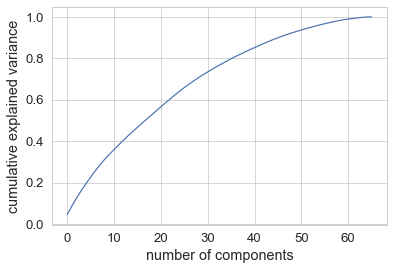

In [80]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### XGBoost for Chicago

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgdata = df_multi
xgdata =  xgdata.drop(['Primary Type'], axis=1)

#X, y = xgdata.iloc[:,:-1],xgdata.iloc[:,-1]
X = xgdata.drop(['HARDSHIP INDEX'], axis=1)
y = xgdata[['HARDSHIP INDEX']]

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 20, alpha = 10, n_estimators = 3, n_jobs=1, importance_type='gain')
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = "%.2f" % ((np.sqrt(mean_squared_error(y_test, preds)))*100)
print(st.wb + "Relative Mean Square Error RMSE: \t" + st.end + st.mag + "", rmse)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 3, 'alpha': 1}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

Relative Mean Square Error RMSE: 	 86.63


In [82]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=20)
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\harri\Anaconda3\Library\bin\graphviz'

#plt.rcParams['figure.figsize'] = [800,25]
#xgb.plot_tree(xg_reg,num_trees=6)
#plt.show()

### Feature Importance

In [83]:
df_features=pd.read_csv("crimefinal.csv")
df_features['Block'] = pd.factorize(df_features["Block"])[0]
df_features['Description'] = pd.factorize(df_features["Description"])[0]
df_features['Primary Type'] = pd.factorize(df_features["Primary Type"])[0]
df_features['District'] = pd.factorize(df_features["District"])[0]
df_features['IUCR'] = pd.factorize(df_features["IUCR"])[0]
df_features['Ward'] = pd.factorize(df_features["Ward"])[0]
df_features['FBI Code'] = pd.factorize(df_features["FBI Code"])[0]

In [84]:
Classifier = DecisionTreeClassifier()
scaler = MinMaxScaler()
# X -> features, y -> label 
X = df_features.drop(['severe','Date','Location','time_24hour'], axis=1)
y = df_features[['severe']]
X = scaler.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2, random_state = 25)
model = Classifier.fit(Xtrain, ytrain)
pred = model.predict(Xtest) 


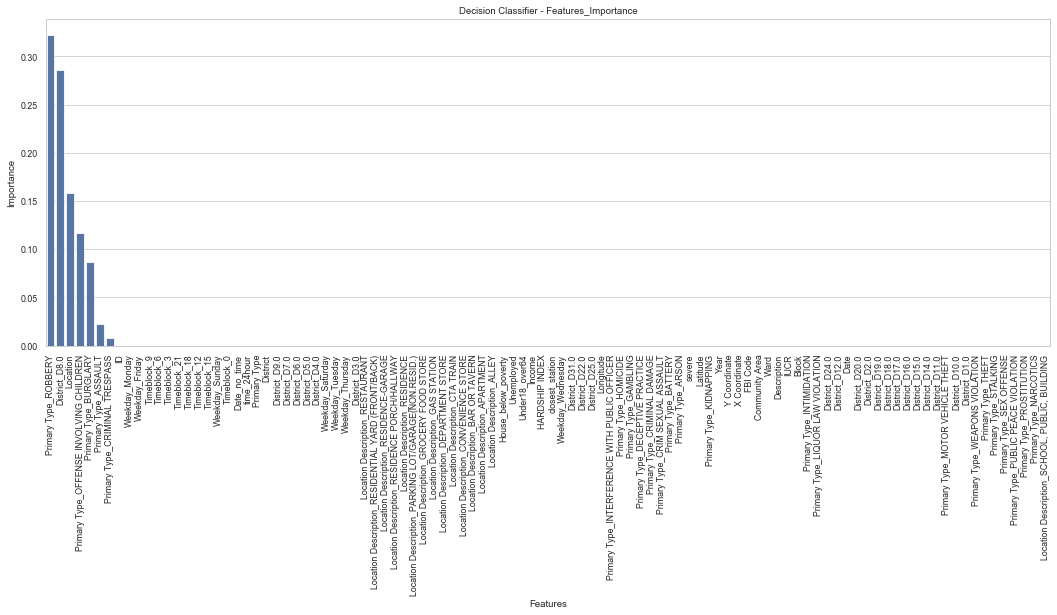

In [89]:
features_tuple=list(zip(df_features.columns,model.feature_importances_))
feature_imp=pd.DataFrame(features_tuple,columns=['Feature_Name','Importance'])
feature_imp = feature_imp.sort_values('Importance',ascending=False)
plt.figure(figsize=(18,6))
ax.tick_params(axis='both', which='major', labelsize=8.5)
sns.barplot(x="Feature_Name",y="Importance", data=feature_imp, color='b')
sns.set_context("paper", font_scale=1) 
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features_Importance")
plt.savefig('FeatureImp.jpg')

## Visualizing the Data

In [86]:
#Load the File Created above
crimedata=pd.read_csv("crimevisual.csv")
#Just get an idea on the types of crimes
crimetypegb=crimedata.groupby(["Primary Type"])["Primary Type"].count()/len(crimedata)*100
crimetypegb.sort_values(ascending=False, inplace=True)

### Mapping the Crime

In [87]:
import folium
from IPython.display import HTML
crimecount = crimedata[['Latitude', 'Longitude']].copy()

crimecount['Counts'] = crimecount.groupby(['Latitude'])['Longitude'].transform('count')
crimecount = crimecount.sort_values(by = 'Counts', ascending=False)
crimecount = crimecount.drop_duplicates(subset='Counts', keep="first")

In [88]:
from folium.plugins import HeatMap
base_map = folium.Map(location=[41.8835, -87.627877], control_scale=True, zoom_start=12)
HeatMap(data=crimecount[['Latitude', 'Longitude', 'Counts']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map